# Trabajo de Grado - Maestría en Ciencia de Datos
## Construcción de Score de Credito para una Cooperativa de Cali - Valle del Cauca
### Daniel Alejandro Rengifo Aguirre

### 1 Importación de Librerías

In [1]:
#%%capture
import math


import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression #modelamiento
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from IPython.display import display
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score,roc_curve, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

pd.set_option('display.float_format', '{:,.2f}'.format)
np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### 1.1 Primer análisis de la Data

In [2]:
df = pd.read_csv('DATA_202404.csv', encoding='latin1', low_memory=False)
df.columns = df.columns.astype(str).str.strip()
df.head(3)



,SUCURSAL,ESTADO,EDAD,TIPO_DE_ASOCIADO,SUELDO,COD_DEPEND,SEXO,ANTIGUEDAD,ESTADO_CIVIL,NRO_HIJOS,...,DIAS_VENCIDOS_INT,VENCIDO_INT,DIAS_VENCIDOS_CAPITAL,VALOR_PERDIDA_ESPERADA_APLICADA,VALOR_COMERCIAL_ACTIVOS,VALOR_SALDO_PASIVOS,SCORING,ANTIGÜEDAD_AÑOS,CANAL,SCORING_CAT
0,2,Asociado Activo,39,Empresa Vinculada,5500000,0,F,12,Union libre,2,...,0,0,0,30150,0,9211000,85,12.46,OTRAS,ALTO
1,2,Asociado Activo,39,Empresa Vinculada,5500000,0,F,12,Union libre,2,...,0,0,0,19685,175000000,105013000,80,12.46,OTRAS,MEDIO
2,2,Asociado Activo,39,Empresa Vinculada,5500000,0,F,12,Union libre,2,...,0,0,0,44010,175000000,100112000,80,12.46,OTRAS,MEDIO


La información objeto del presenta estudio obedece a los datos extraidos directamente de la Cooperativa, a traves de un proceso de extracción se cuenta con la siguiente información la cual contiene variables cualitativas y cuantitativas de los asociados que presentan endeudamiento con la entidad al corte de Abril de 2024. En este primer análisis observamos que el Dataset, cuenta con 6628 registros, cada uno de estos tiene que ver con cada obligación vigente dentro de la contabilidad de la Cooperativa y su información asociada para cada una de las columnas del dataset, en su totalidad son 113 campos a analizar.

In [3]:
df.shape

(6628, 48)

Se encontraron variables con valores nulos, en próximos apartados se realizará una decisión sobre como abordar este problema. Sin embargo, para las variabless PI Manual & PDI Manual se recomienda no usarlas dentro del ejercicio

In [4]:
df.describe()

,SUCURSAL,EDAD,SUELDO,COD_DEPEND,ANTIGUEDAD,NRO_HIJOS,PERSONAS_ACARGO,VALOR_INGRESO_MENSUAL,VALOR_EGRESO_MENSUAL,AHORRO_PERMANENTE,...,CANTIDAD_GARANTÍAS,VLRAPLICADO_GARANT,DIAS_VENCIDOS_INT,VENCIDO_INT,DIAS_VENCIDOS_CAPITAL,VALOR_PERDIDA_ESPERADA_APLICADA,VALOR_COMERCIAL_ACTIVOS,VALOR_SALDO_PASIVOS,SCORING,ANTIGÜEDAD_AÑOS
count,"6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00",...,"6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00"
mean,2.60,46.24,"4,768,155.97",6.30,13.13,1.11,1.23,"4,819,438.53","680,918.92","97,465.67",...,0.05,"1,888,227.24",20.92,"69,719.88",22.25,"274,066.48","177,216,043.07","32,591,443.27",70.40,13.14
std,1.93,12.78,"4,793,415.19",54.04,11.20,1.02,1.17,"4,831,118.25","960,680.86","226,599.39",...,0.21,"13,696,956.01",175.33,"959,613.51",183.76,"2,426,181.35","314,947,403.82","78,670,505.86",27.74,11.20
min,1.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,"-5,750,962.00",0.00,0.00,0.00,"-44,172,791.00",0.00,0.02
25%,1.00,36.00,"1,905,632.00",0.00,5.00,0.00,0.00,"1,950,000.00","202,400.00",0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,"5,000,000.00","206,750.00",65.00,4.94
50%,2.00,45.00,"3,240,000.00",0.00,10.00,1.00,1.00,"3,275,633.00","371,200.00",0.00,...,0.00,0.00,0.00,0.00,0.00,"7,425.50","98,000,000.00","5,174,000.00",78.00,10.34
75%,3.00,55.00,"5,500,000.00",0.00,17.00,2.00,2.00,"5,529,937.00","719,280.00","127,897.00",...,0.00,0.00,0.00,0.00,0.00,"40,316.50","217,000,000.00","31,240,750.00",88.00,17.30
max,6.00,95.00,"47,460,000.00","1,003.00",62.00,8.00,6.00,"47,460,000.00","17,831,798.00","4,009,383.00",...,1.00,"338,671,650.57","3,865.00","65,844,765.00","3,895.00","125,876,307.00","10,015,000,000.00","2,597,835,000.00",100.00,62.14


### Distribución del Score por Intervalo

In [5]:
#Paleta de colores.

sns.set_style("dark")
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

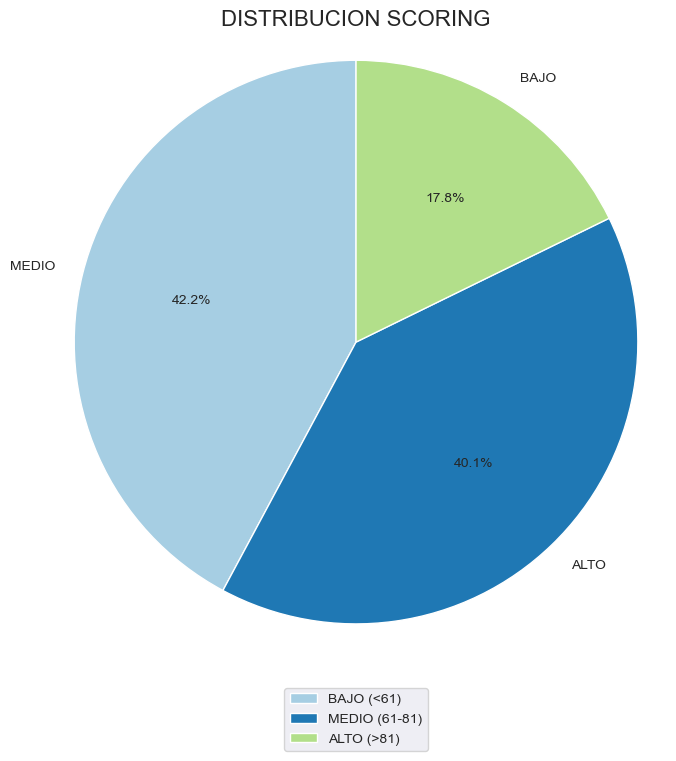

In [6]:
scoring_counts = df['SCORING_CAT'].value_counts()

# Configuración de estilo y colores
sns.set_style("dark")
colors = sns.color_palette("Paired")

# Gráfica de torta
plt.figure(figsize=(8, 8))
plt.pie(scoring_counts, labels=scoring_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("DISTRIBUCION SCORING", fontsize=16)
plt.axis('equal')  # Asegurar que el gráfico sea circular

plt.legend(
    labels=['BAJO (<61)', 'MEDIO (61-81)', 'ALTO (>81)'], 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.05), 
    ncol=1,
    fontsize=10
)

# Mostrar la gráfica
plt.show()

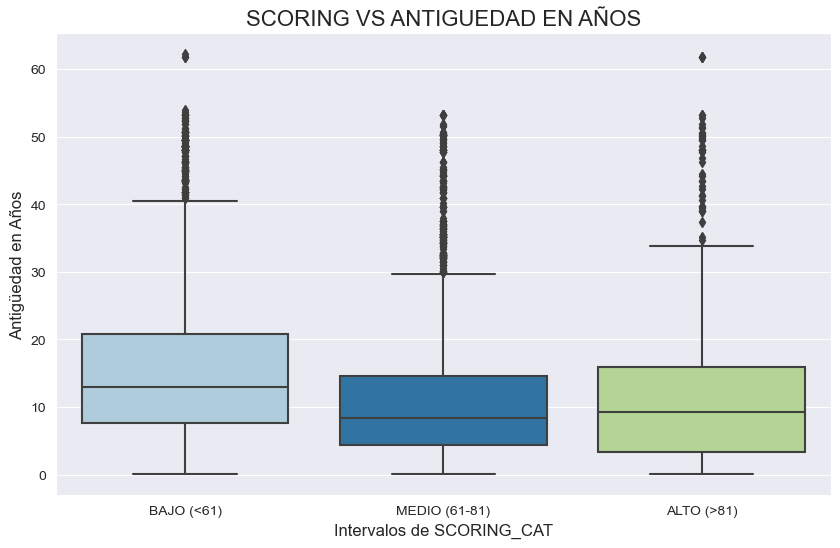

In [7]:
# Configuración del estilo de Seaborn
sns.set_style("darkgrid")

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='SCORING_CAT', y='ANTIGÜEDAD_AÑOS', data=df, palette="Paired")

# Etiquetas personalizadas para los intervalos de scoring
plt.xticks(ticks=[0, 1, 2], labels=['BAJO (<61)', 'MEDIO (61-81)', 'ALTO (>81)'])

# Títulos y etiquetas
plt.title("SCORING VS ANTIGUEDAD EN AÑOS", fontsize=16)
plt.xlabel("Intervalos de SCORING_CAT", fontsize=12)
plt.ylabel("Antigüedad en Años", fontsize=12)

# Mostrar la gráfica
plt.show()

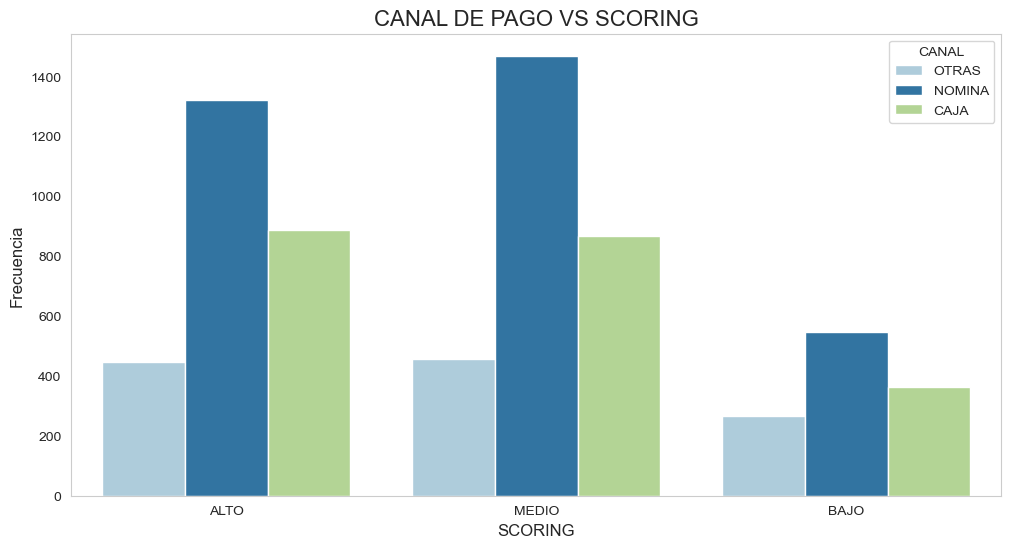

In [8]:
# Configuración del estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de distribución
plt.figure(figsize=(12, 6))
sns.countplot(x='SCORING_CAT', hue='CANAL', data=df, palette="Paired")

# Títulos y etiquetas
plt.grid(False)
plt.title("CANAL DE PAGO VS SCORING", fontsize=16)
plt.xlabel("SCORING", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Mostrar la gráfica
plt.show()

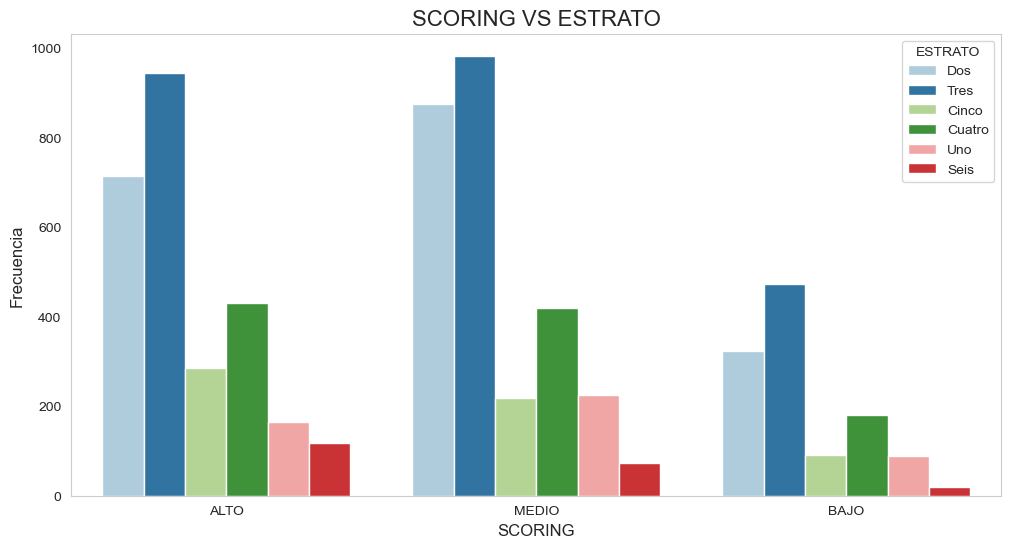

In [9]:
# Configuración del estilo de Seaborn
sns.set_style("whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='SCORING_CAT', hue='ESTRATO', data=df, palette="Paired")

# Títulos y etiquetas
plt.title("SCORING VS ESTRATO", fontsize=16)
plt.xlabel("SCORING", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(False)
# Mostrar la gráfica
plt.show()


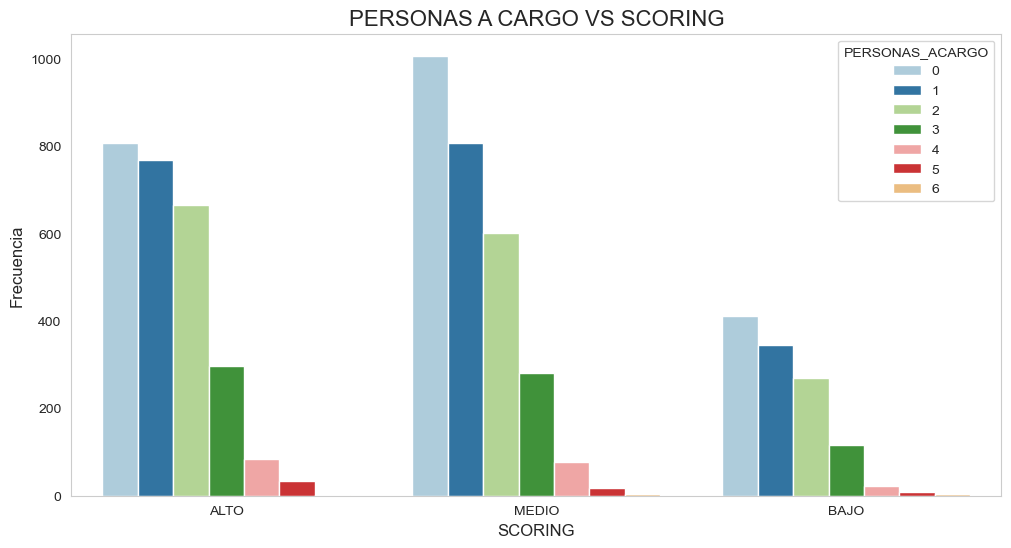

In [10]:
# Configuración del estilo de Seaborn
sns.set_style("whitegrid")

# Crear un gráfico de barras para la frecuencia de 'PERSONAS_ACARGO' vs 'SCORING_CAT'
plt.figure(figsize=(12, 6))
sns.countplot(x='SCORING_CAT', hue='PERSONAS_ACARGO', data=df, palette="Paired")

# Títulos y etiquetas
plt.title("PERSONAS A CARGO VS SCORING", fontsize=16)
plt.xlabel("SCORING", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(False)
# Mostrar la gráfica
plt.show()


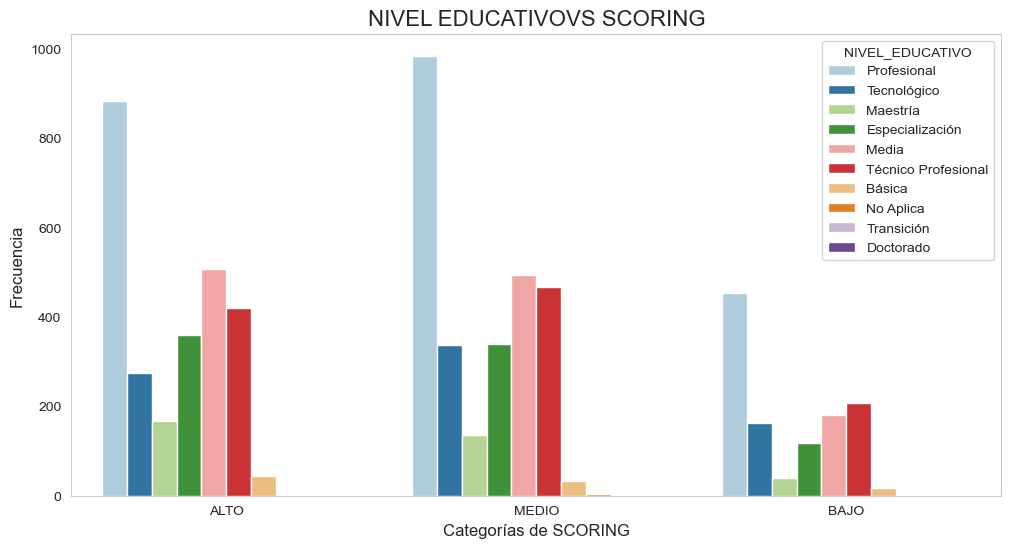

In [11]:
sns.set_style("whitegrid")

# Crear un gráfico de barras para la frecuencia de 'NIVEL_EDUCATIVO' vs 'SCORING_CAT'
plt.figure(figsize=(12, 6))
sns.countplot(x='SCORING_CAT', hue='NIVEL_EDUCATIVO', data=df, palette="Paired")

# Títulos y etiquetas
plt.title("NIVEL EDUCATIVOVS SCORING", fontsize=16)
plt.xlabel("Categorías de SCORING", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(False)
# Mostrar la gráfica
plt.show()

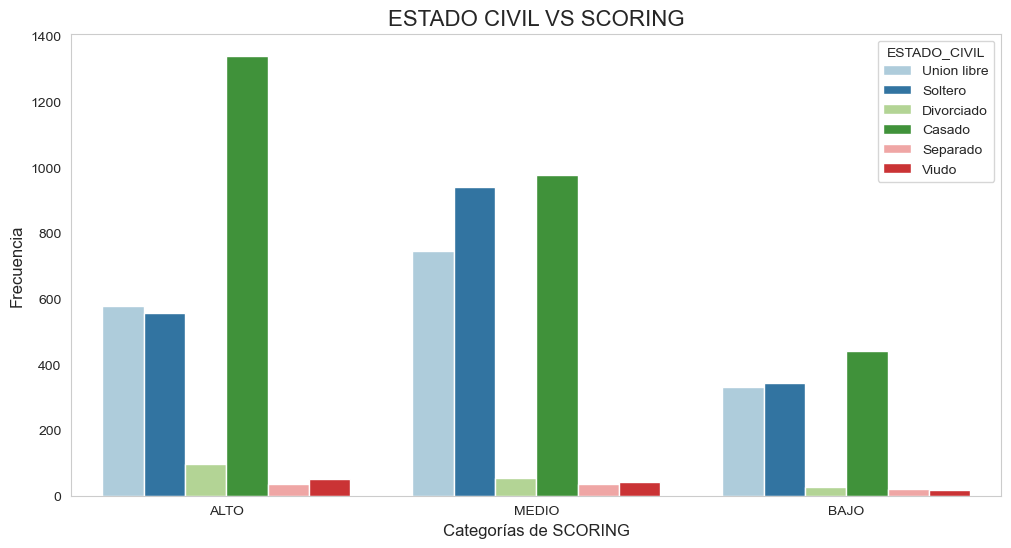

In [12]:
# Configuración del estilo de Seaborn
sns.set_style("whitegrid")

# Crear un gráfico de barras para la frecuencia de 'ESTADO_CIVIL' vs 'SCORING_CAT'
plt.figure(figsize=(12, 6))
sns.countplot(x='SCORING_CAT', hue='ESTADO_CIVIL', data=df, palette="Paired")

# Títulos y etiquetas
plt.title("ESTADO CIVIL VS SCORING", fontsize=16)
plt.xlabel("Categorías de SCORING", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(False)
# Mostrar la gráfica
plt.show()

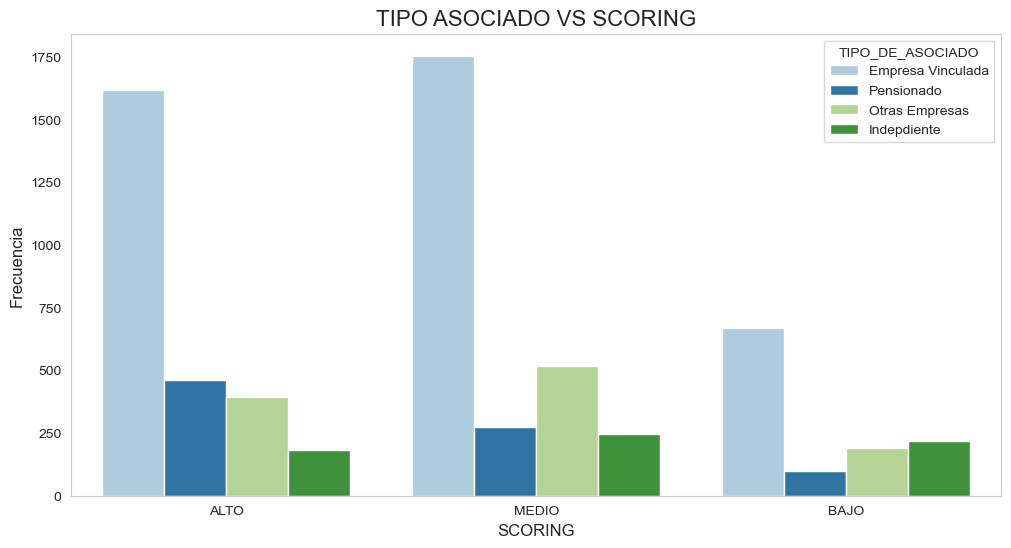

In [13]:
sns.set_style("whitegrid")

# Crear un gráfico de barras para la frecuencia de 'TIPO_DE_ASOCIADO' vs 'SCORING_CAT'
plt.figure(figsize=(12, 6))
sns.countplot(x='SCORING_CAT', hue='TIPO_DE_ASOCIADO', data=df, palette="Paired")

# Títulos y etiquetas
plt.title("TIPO ASOCIADO VS SCORING", fontsize=16)
plt.xlabel("SCORING", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(False)
# Mostrar la gráfica
plt.show()

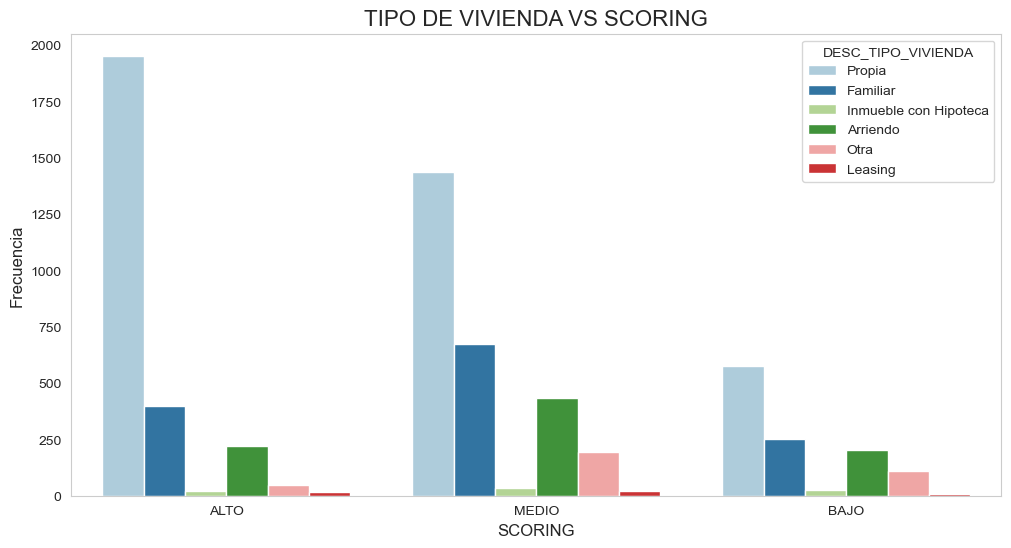

In [14]:
# Configuración del estilo de Seaborn
sns.set_style("whitegrid")

# Crear un gráfico de barras para la frecuencia de 'DESC_TIPO_VIVIENDA' vs 'SCORING_CAT'
plt.figure(figsize=(12, 6))
sns.countplot(x='SCORING_CAT', hue='DESC_TIPO_VIVIENDA', data=df, palette="Paired")

# Títulos y etiquetas
plt.title("TIPO DE VIVIENDA VS SCORING", fontsize=16)
plt.xlabel("SCORING", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(False)
# Mostrar la gráfica
plt.show()

## Limpieza y Preparación de los Datos

A partir del análisis exploratorio de datos realizaremos la limpieza correspondiente, tomaremos la información detallada para limpiar cada variable. Removeremos algunos atributos que no contribuyen al análisis, para mantener la base de datos con todos los factores que consideramos relevantes.

1)Información de la data
2)Manejamos los datos nulos
3)Corregimos los datos erróneos
4)Cambiamos el formato de las variables

In [15]:
df['SEXO'].unique()

array(['F', 'M'], dtype=object)

In [16]:
df['ESTADO'].unique()

array(['Asociado Activo', 'No asociado'], dtype=object)

In [17]:
df['TIPO_DE_ASOCIADO'].unique()

array(['Empresa Vinculada', 'Pensionado', 'Otras Empresas', 'Indepdiente'],
      dtype=object)

In [18]:
df['ESTADO_CIVIL'].unique()

array(['Union libre', 'Soltero', 'Divorciado', 'Casado', 'Separado',
       'Viudo'], dtype=object)

In [19]:
df['NIVEL_EDUCATIVO'].unique()

array(['Profesional', 'Tecnológico', 'Maestría', 'Especialización',
       'Media', 'Técnico Profesional', 'Básica', 'No Aplica',
       'Transición', 'Doctorado'], dtype=object)

In [20]:
df['DESC_TIPO_VIVIENDA'].unique()

array(['Propia', 'Familiar', 'Inmueble con Hipoteca', 'Arriendo', 'Otra',
       'Leasing'], dtype=object)

In [21]:
df['CODEUDORES'].unique()

array(['Sin Codeudor', 'Codeudor'], dtype=object)

In [22]:
df['GARANTÍA_REAL'].unique()

array(['Sin Garantia', 'Hipoteca', 'Prenda'], dtype=object)

In [23]:
df['CANAL'].unique()

array(['OTRAS', 'NOMINA', 'CAJA'], dtype=object)

In [24]:
df['ESTRATO'].unique()

array(['Dos', 'Tres', 'Cinco', 'Cuatro', 'Uno', 'Seis'], dtype=object)

In [25]:
# Diccionarios de mapeo para las categorías
SEXO = {
    0: 'F',
    1: 'M'
}

ESTADO = {
    0: 'Asociado Activo',
    1: 'No asociado'
}

TIPO_DE_ASOCIADO = {
    0: 'Empresa Vinculada',
    1: 'Pensionado',
    2: 'Otras Empresas',
    3: 'Indepdiente'
}

ESTADO_CIVIL = {
    0: 'Union libre',
    1: 'Soltero',
    2: 'Divorciado',
    3: 'Casado',
    4: 'Separado',
    5: 'Viudo'
}

NIVEL_EDUCATIVO = {
    0: 'Profesional',
    1: 'Tecnológico',
    2: 'Maestría',
    3: 'Especialización',
    4: 'Media',
    5: 'Técnico Profesional',
    6: 'Básica',
    7: 'No Aplica',
    8: 'Transición',
    9: 'Doctorado'
}

DESC_TIPO_VIVIENDA = {
    0: 'Propia',
    1: 'Familiar',
    2: 'Inmueble con Hipoteca',
    3: 'Arriendo',
    4: 'Otra',
    5: 'Leasing'
}

CODEUDORES = {
    0: 'Sin Codeudor',
    1: 'Codeudor'
}

GARANTÍA_REAL = {
    0: 'Sin Garantia',
    1: 'Hipoteca',
    2: 'Prenda'
}

CANAL = {
    0: 'OTRAS',
    1: 'NOMINA',
    2: 'CAJA'
}

ESTRATO = {
    0: 'Uno',
    1: 'Dos',
    2: 'Tres',
    3: 'Cuatro',
    4: 'Cinco',
    5: 'Seis'
}

# Diccionario de traducción completo
translation_dict = {
    "SEXO": SEXO,
    "ESTADO": ESTADO,
    "TIPO_DE_ASOCIADO": TIPO_DE_ASOCIADO,
    "ESTADO_CIVIL": ESTADO_CIVIL,
    "NIVEL_EDUCATIVO": NIVEL_EDUCATIVO,
    "DESC_TIPO_VIVIENDA": DESC_TIPO_VIVIENDA,
    "CODEUDORES": CODEUDORES,
    "GARANTÍA_REAL": GARANTÍA_REAL,
    "CANAL": CANAL,
    "ESTRATO": ESTRATO
    }

In [26]:
X, y = df.drop(columns="SCORING_CAT"), df["SCORING_CAT"]

In [27]:
columnas_a_category = ['SEXO','ESTADO','TIPO_DE_ASOCIADO','ESTADO_CIVIL','NIVEL_EDUCATIVO',
                      'DESC_TIPO_VIVIENDA','CODEUDORES','GARANTÍA_REAL','CANAL','ESTRATO']

In [28]:
class CategoricalVariablesTranslation(BaseEstimator, TransformerMixin):
    """Traduce los datos de códigos numéricos a categorías con el tipo de dato Category"""
    def __init__(self):
        # Guarda la traducción de datos de códigos a categorías
        self.translation_dict = translation_dict
        self.columnas_a_category = columnas_a_category

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Traducir
        X_train = X.replace(self.translation_dict)
        # Dar formato de category
        X_train[list(translation_dict.keys())] = X_train[list(translation_dict.keys())].astype('category')
        X_train[self.columnas_a_category] = X_train[self.columnas_a_category].astype('category')
        return X_train

In [29]:
traductor = CategoricalVariablesTranslation()
transformed_df = traductor.fit_transform(df)
display(transformed_df[list(translation_dict.keys())].head())
print(transformed_df[list(translation_dict.keys())].dtypes)

,SEXO,ESTADO,TIPO_DE_ASOCIADO,ESTADO_CIVIL,NIVEL_EDUCATIVO,DESC_TIPO_VIVIENDA,CODEUDORES,GARANTÍA_REAL,CANAL,ESTRATO
0,F,Asociado Activo,Empresa Vinculada,Union libre,Profesional,Propia,Sin Codeudor,Sin Garantia,OTRAS,Dos
1,F,Asociado Activo,Empresa Vinculada,Union libre,Profesional,Propia,Sin Codeudor,Sin Garantia,OTRAS,Dos
2,F,Asociado Activo,Empresa Vinculada,Union libre,Profesional,Propia,Sin Codeudor,Sin Garantia,OTRAS,Dos
3,F,Asociado Activo,Empresa Vinculada,Soltero,Tecnológico,Familiar,Sin Codeudor,Sin Garantia,NOMINA,Dos
4,F,Asociado Activo,Empresa Vinculada,Soltero,Tecnológico,Familiar,Sin Codeudor,Sin Garantia,NOMINA,Dos


SEXO                  category
ESTADO                category
TIPO_DE_ASOCIADO      category
ESTADO_CIVIL          category
NIVEL_EDUCATIVO       category
DESC_TIPO_VIVIENDA    category
CODEUDORES            category
GARANTÍA_REAL         category
CANAL                 category
ESTRATO               category
dtype: object


In [30]:
transformed_df[list(translation_dict.keys())].describe().T

,count,unique,top,freq
SEXO,6628,2,M,3636
ESTADO,6628,2,Asociado Activo,6382
TIPO_DE_ASOCIADO,6628,4,Empresa Vinculada,4042
ESTADO_CIVIL,6628,6,Casado,2758
NIVEL_EDUCATIVO,6628,10,Profesional,2320
DESC_TIPO_VIVIENDA,6628,6,Propia,3969
CODEUDORES,6628,2,Sin Codeudor,6403
GARANTÍA_REAL,6628,3,Sin Garantia,6316
CANAL,6628,3,NOMINA,3338
ESTRATO,6628,6,Tres,2400


## VARIABLES ENTERAS

In [31]:
non_negative_int_variables = ['EDAD', 'ANTIGUEDAD', 'NRO_HIJOS', 'PERSONAS_ACARGO',
                              'DIAS_VENCIDOS','VLRCOBERTURA_DISPONIBLE',
                              'NOCUOTAS', 'ALTURA', 'INT_CTE_ORDEN']
df[non_negative_int_variables].describe()

,EDAD,ANTIGUEDAD,NRO_HIJOS,PERSONAS_ACARGO,DIAS_VENCIDOS,VLRCOBERTURA_DISPONIBLE,NOCUOTAS,ALTURA,INT_CTE_ORDEN
count,"6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00","6,628.00"
mean,46.24,13.13,1.11,1.23,22.25,"4,138,755.31",48.85,17.05,"38,748.78"
std,12.78,11.20,1.02,1.17,183.76,"24,872,153.76",38.51,20.02,"816,240.72"
min,18.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,36.00,5.00,0.00,0.00,0.00,0.00,24.00,3.00,0.00
50%,45.00,10.00,1.00,1.00,0.00,0.00,48.00,11.00,0.00
75%,55.00,17.00,2.00,2.00,0.00,0.00,60.00,24.00,0.00
max,95.00,62.00,8.00,6.00,"3,895.00","540,774,533.00",360.00,250.00,"59,080,334.00"


## OUTLIERS

In [32]:
transformed_df

,SUCURSAL,ESTADO,EDAD,TIPO_DE_ASOCIADO,SUELDO,COD_DEPEND,SEXO,ANTIGUEDAD,ESTADO_CIVIL,NRO_HIJOS,...,DIAS_VENCIDOS_INT,VENCIDO_INT,DIAS_VENCIDOS_CAPITAL,VALOR_PERDIDA_ESPERADA_APLICADA,VALOR_COMERCIAL_ACTIVOS,VALOR_SALDO_PASIVOS,SCORING,ANTIGÜEDAD_AÑOS,CANAL,SCORING_CAT
0,2,Asociado Activo,39,Empresa Vinculada,5500000,0,F,12,Union libre,2,...,0,0,0,30150,0,9211000,85,12.46,OTRAS,ALTO
1,2,Asociado Activo,39,Empresa Vinculada,5500000,0,F,12,Union libre,2,...,0,0,0,19685,175000000,105013000,80,12.46,OTRAS,MEDIO
2,2,Asociado Activo,39,Empresa Vinculada,5500000,0,F,12,Union libre,2,...,0,0,0,44010,175000000,100112000,80,12.46,OTRAS,MEDIO
3,1,Asociado Activo,34,Empresa Vinculada,2986100,0,F,11,Soltero,0,...,0,0,0,3233,2800000,7968002,95,10.54,NOMINA,ALTO
4,1,Asociado Activo,34,Empresa Vinculada,2986100,0,F,11,Soltero,0,...,0,0,0,1651,2000000,0,80,10.54,NOMINA,MEDIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6623,1,Asociado Activo,62,Pensionado,2470000,0,F,25,Soltero,1,...,0,0,0,82007,308000000,1,95,24.80,OTRAS,ALTO
6624,6,Asociado Activo,53,Pensionado,1853000,0,M,3,Casado,2,...,0,75103,0,82830,520000000,88572000,70,2.54,OTRAS,MEDIO
6625,2,Asociado Activo,57,Pensionado,1300000,0,F,12,Soltero,2,...,0,13306,0,0,150000000,45822000,0,12.40,OTRAS,BAJO
6626,6,Asociado Activo,64,Pensionado,4400000,0,M,9,Casado,1,...,0,0,0,0,157000000,8796000,80,8.71,OTRAS,MEDIO


## VARIABLES NUMERICAS

In [33]:
# Lista de columnas a convertir
columnas_a_convertir = [
    'SUELDO',
    'VALOR_INGRESO_MENSUAL',
    'VALOR_EGRESO_MENSUAL',
    'AHORRO_PERMANENTE',
    'SLD_APORTES',
    'MONTO_SOLICITADO',
    'SALDO_CAPITAL',
    'SLD_INT',
    'SLD_MORA',
    'VLR_GARANTIA',
    'VLRCOBERTURA_DISPONIBLE',
    'VALOR_COMERCIAL_ACTIVOS',
    'VALOR_SALDO_PASIVOS'
]

# Reemplazar puntos, comas y eliminar espacios, ignorando errores
for columna in columnas_a_convertir:
    if df[columna].dtype == 'object':  # Verificar si la columna es de tipo texto
        # Limpiar datos: eliminar espacios, puntos y cambiar comas por puntos
        df[columna] = df[columna].str.replace(' ', '').str.replace('.', '', regex=False).str.replace(',', '.')
        # Convertir a float, ignorando errores y colocando NaN en valores no convertibles
        df[columna] = pd.to_numeric(df[columna], errors='coerce')
    else:
        df[columna] = pd.to_numeric(df[columna], errors='coerce')  # Convertir directamente si no es texto

# Verificar si hay valores NaN y mostrarlos
na_values = df[columnas_a_convertir].isna().sum()
print("Valores NaN después de la conversión:\n", na_values)



Valores NaN después de la conversión:
 SUELDO                     0
VALOR_INGRESO_MENSUAL      0
VALOR_EGRESO_MENSUAL       0
AHORRO_PERMANENTE          0
SLD_APORTES                0
MONTO_SOLICITADO           0
SALDO_CAPITAL              0
SLD_INT                    0
SLD_MORA                   0
VLR_GARANTIA               0
VLRCOBERTURA_DISPONIBLE    0
VALOR_COMERCIAL_ACTIVOS    0
VALOR_SALDO_PASIVOS        0
dtype: int64


In [34]:
numeric_cols = [col for col in transformed_df.columns if transformed_df[col].dtype in ['float64','int64']]
numeric_cols

['SUCURSAL',
 'EDAD',
 'SUELDO',
 'COD_DEPEND',
 'ANTIGUEDAD',
 'NRO_HIJOS',
 'PERSONAS_ACARGO',
 'VALOR_INGRESO_MENSUAL',
 'VALOR_EGRESO_MENSUAL',
 'AHORRO_PERMANENTE',
 'SLD_APORTES',
 'NO_OBLIGACIÓN',
 'MONTO_SOLICITADO',
 'SALDO_CAPITAL',
 'SLD_INT',
 'SLD_MORA',
 'DIAS_VENCIDOS',
 'VENCCAPITAL',
 'VLR_GARANTIA',
 'VLRCOBERTURA_DISPONIBLE',
 'VLR_CUOTA',
 'NOCUOTAS',
 'ALTURA',
 'INT_CTE_ORDEN',
 'INT_MORA_ORDEN',
 'SLD_SEG_VIDA',
 'SUCCREDITO',
 'CANTIDAD_GARANTÍAS',
 'VLRAPLICADO_GARANT',
 'DIAS_VENCIDOS_INT',
 'VENCIDO_INT',
 'DIAS_VENCIDOS_CAPITAL',
 'VALOR_PERDIDA_ESPERADA_APLICADA',
 'VALOR_COMERCIAL_ACTIVOS',
 'VALOR_SALDO_PASIVOS',
 'SCORING',
 'ANTIGÜEDAD_AÑOS']

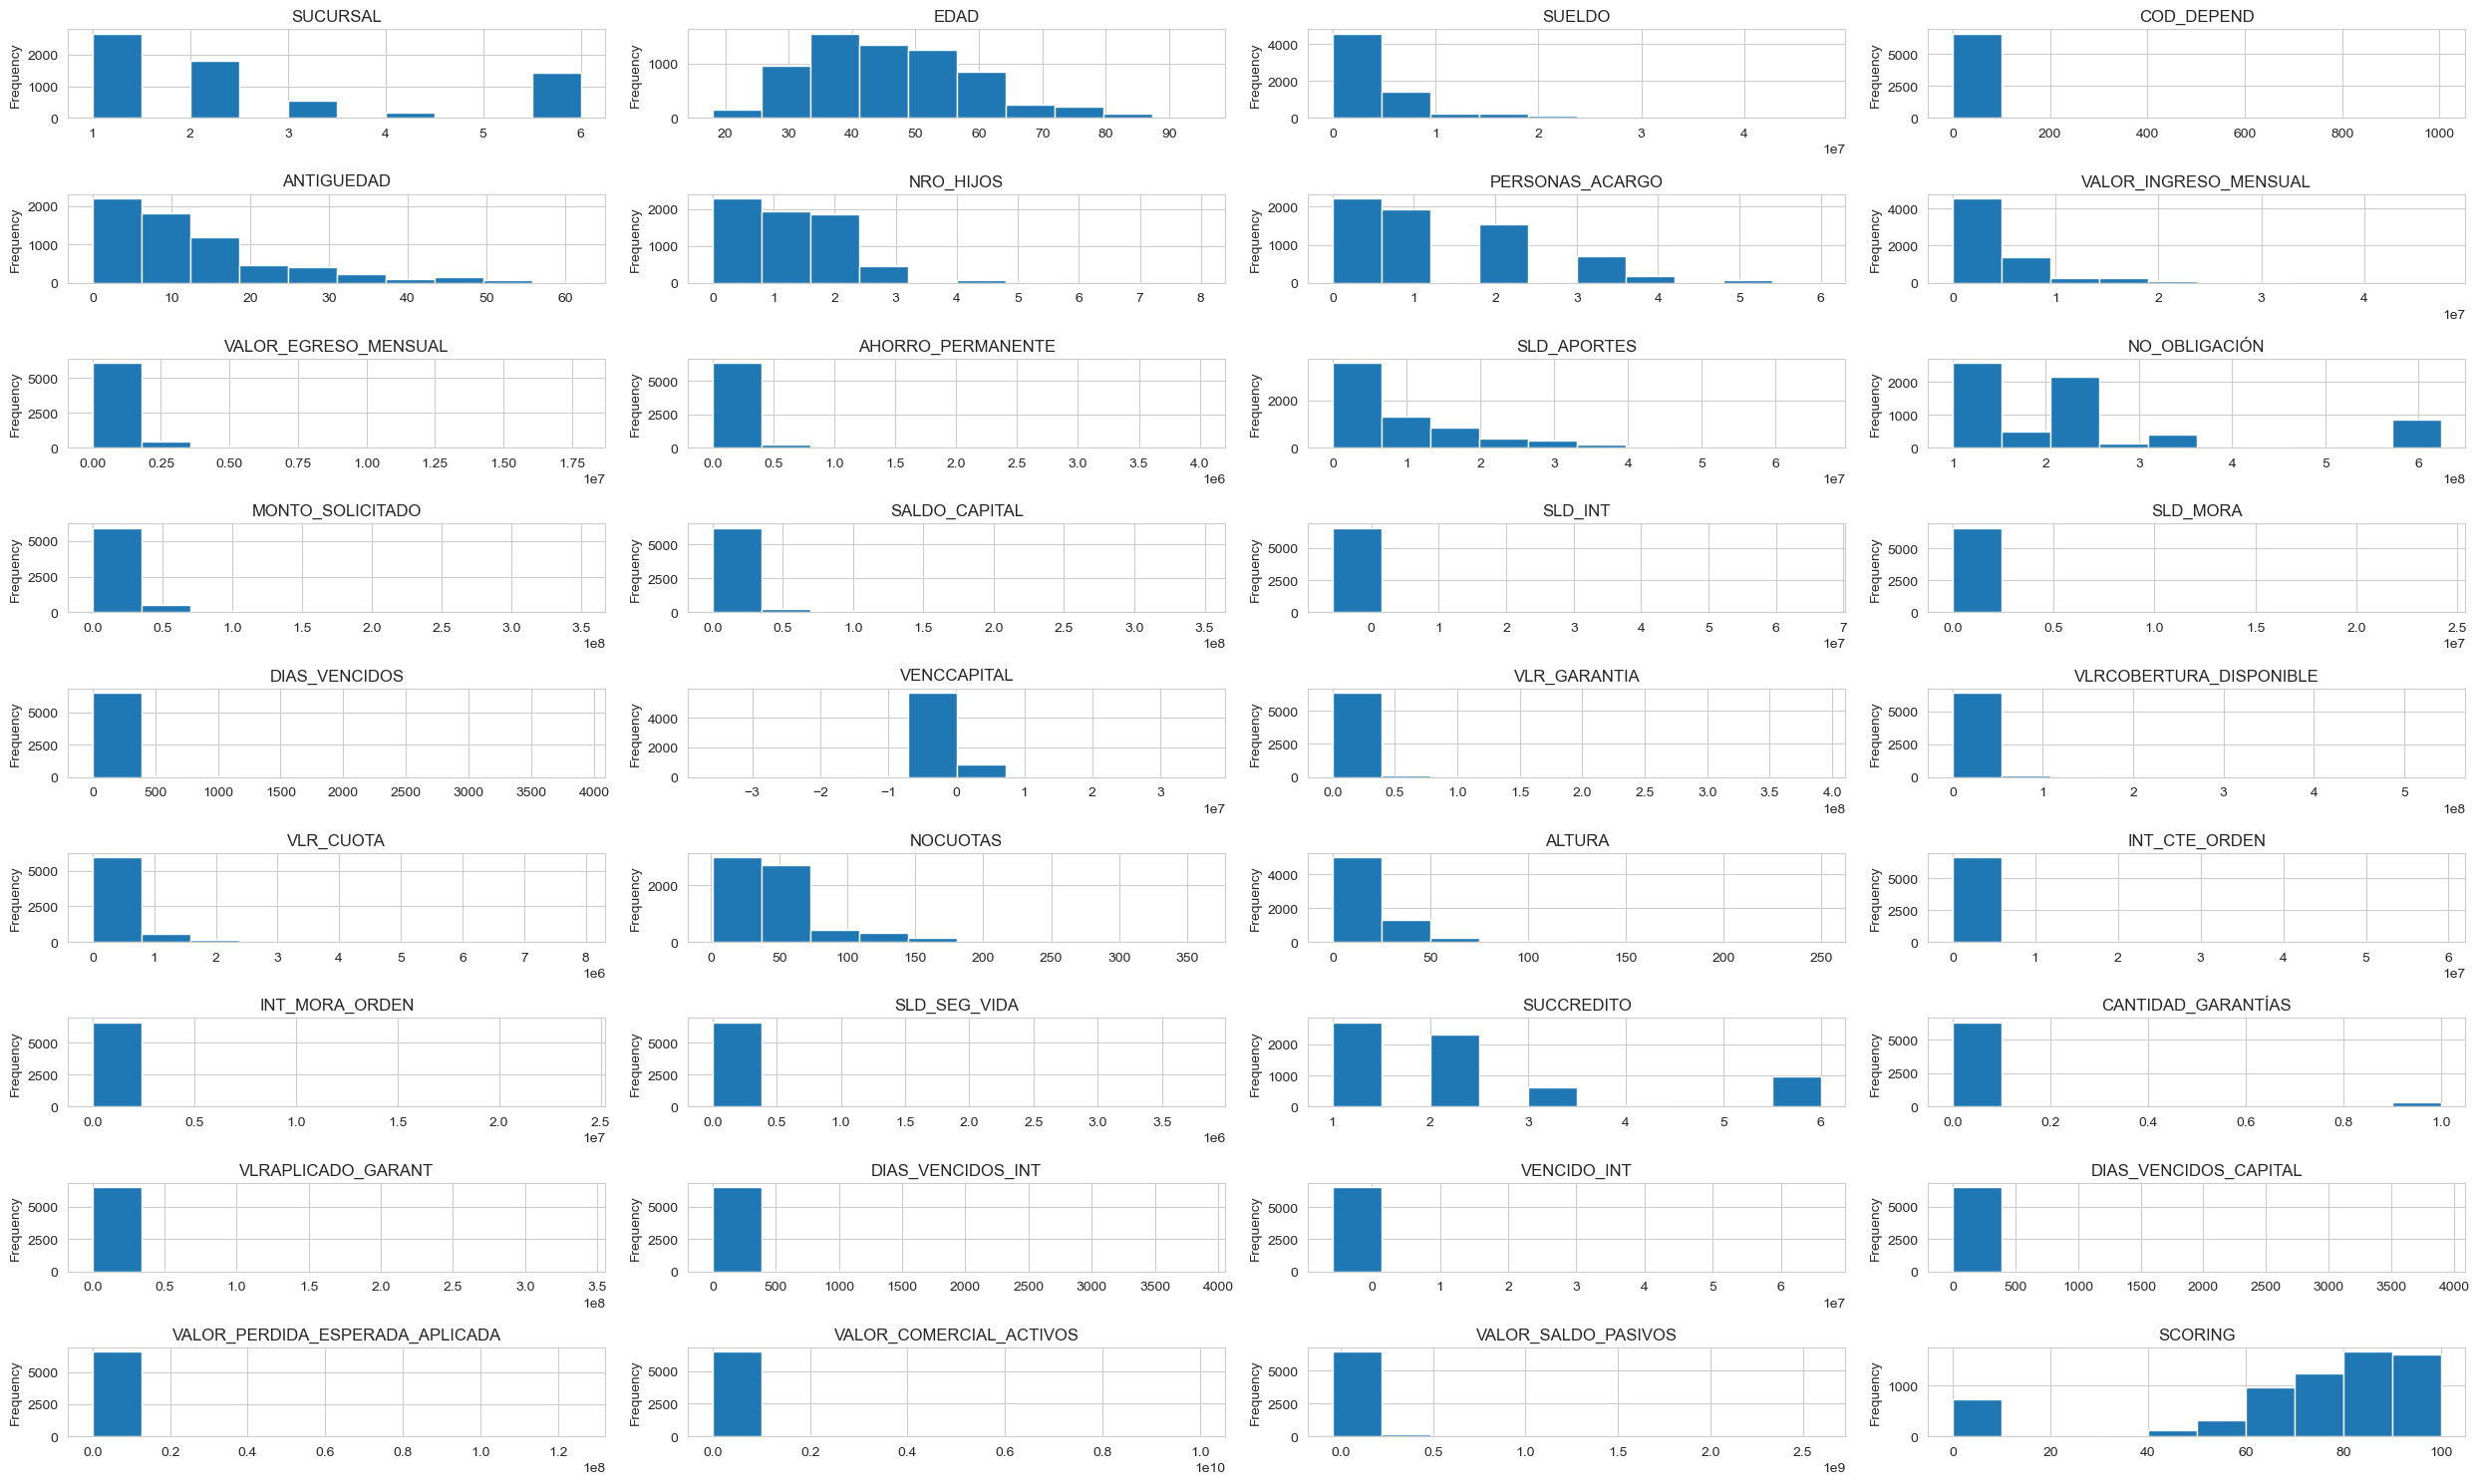

In [35]:
# Iterar y graficar cada columna numérica en `numeric_cols`
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(25,15))
for col, ax in zip(numeric_cols, axes.flatten()):
    transformed_df[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()
plt.show()


In [36]:
# Crear un diccionario para almacenar los índices de los outliers en cada columna numérica
outliers = dict()
for col in numeric_cols:
    outliers[col + "_outliers"] = set(transformed_df[col].nlargest(2).index)

# Definir listas para varias columnas, utilizando la sintaxis de asignación correcta
TASA_PERIODO_NAMV = ["TASA_PERIODO(NAMV)"]
VLR_GARANTIA = ["VLR_GARANTIA"]
VLR_APORTES_UTIL_EN_LA_PROVISION = ["VLR_APORTES_UTIL_EN_LA_PROVISION"]
VLRAPLICADO_GARANT = ["VLRAPLICADO_GARANT"]
VALOR_COMERCIAL_ACTIVOSO = ["VALOR_COMERCIAL_ACTIVOS"]
ANTIGÜEDAD_AÑOS = ["ANTIGÜEDAD_AÑOS"]


In [37]:
for col in ANTIGÜEDAD_AÑOS:
  print(f"{col} - Outliers:")
  display(transformed_df.loc[list(outliers[col+"_outliers"]),:])

ANTIGÜEDAD_AÑOS - Outliers:


,SUCURSAL,ESTADO,EDAD,TIPO_DE_ASOCIADO,SUELDO,COD_DEPEND,SEXO,ANTIGUEDAD,ESTADO_CIVIL,NRO_HIJOS,...,DIAS_VENCIDOS_INT,VENCIDO_INT,DIAS_VENCIDOS_CAPITAL,VALOR_PERDIDA_ESPERADA_APLICADA,VALOR_COMERCIAL_ACTIVOS,VALOR_SALDO_PASIVOS,SCORING,ANTIGÜEDAD_AÑOS,CANAL,SCORING_CAT
362,1,Asociado Activo,83,Pensionado,2603730,0,F,62,Soltero,0,...,0,-27986,0,0,120000000,1,95,62.14,CAJA,ALTO
5581,1,Asociado Activo,84,Pensionado,6208960,98,M,62,Casado,1,...,0,0,0,0,431400000,3190000,0,61.72,CAJA,BAJO


## DIVISION DEL DATASET

In [38]:
objetive_col = 'SCORING_CAT'
features_cols = list(transformed_df.columns)
if objetive_col in features_cols:
  features_cols.remove(objetive_col)

In [39]:
X = df.loc[:,features_cols]
y = df.loc[:,[objetive_col]]
X_train, X_evaluation, y_train, y_evaluation = train_test_split(
X,  # matriz con las variables predictivas
y, # array con los valores de la variable objetivo
test_size=0.3,  # proporción a dejar en el test set
random_state=30, # para controlar la semilla aleatoria
stratify=df.loc[:,[objetive_col]]) # indica la variable de estratificación de la muestra

In [40]:
X.columns = X.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_evaluation.columns = X_evaluation.columns.astype(str)
# Convertir todas las columnas posibles a numéricas, colocando NaN en valores no convertibles
##X_train = X_train.apply(pd.to_numeric, errors='coerce')
##X_evaluation = X_evaluation.apply(pd.to_numeric, errors='coerce')


Se dividio el dataset en 2, un subconjunto de entrenamiento y un subconjunto de evaluación, estos se separaron de manera que se conservaran las proporciones para la variable objetivo, aunque en cantidad de datos totales, quedó un 70% para el dataset de entrenamiento y un 30% para el de evaluación, esto nos ayudará a evitar la fuga de datos con los diferentes procesos de limpieza y modelado. Ahora dividiremos el set de evaluación en 2, set de validación y set de prueba. Esto con el objetivo de tener un set de datos con los que podamos evaluar objetivamente el modelo, ya que el de validación servirá para modificar los hiperparámetros de los modelos.

In [41]:
print(X_evaluation.shape)
print(y_evaluation.shape)

(1989, 47)
(1989, 1)


In [42]:
X_validation, X_test, y_validation, y_test = train_test_split(
X_evaluation,  # matriz con las variables predictivas
y_evaluation, # array con los valores de la variable objetivo
test_size=0.5,  # proporción a dejar en el test set
random_state=30, # para controlar la semilla aleatoria
stratify=y_evaluation) # indica la variable de estratificación estratificación de la muestra

In [43]:
X_validation.columns = X_validation.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X_evaluation.columns = X_evaluation.columns.astype(str) 


In [44]:
print("Train:",round((X_train.shape[0]/df.shape[0])*100,2),"%")
print("Validation:",round((X_validation.shape[0]/df.shape[0])*100,2),"%")
print("Test:",round((X_test.shape[0]/df.shape[0])*100,2),"%")

Train: 69.99 %
Validation: 15.0 %
Test: 15.01 %


In [45]:
print(y_train.value_counts(normalize = True)*100)
print(y_validation.value_counts(normalize = True)*100)
print(y_test.value_counts(normalize = True)*100)

SCORING_CAT
MEDIO         42.16
ALTO          40.07
BAJO          17.76
dtype: float64
SCORING_CAT
MEDIO         42.15
ALTO          40.04
BAJO          17.81
dtype: float64
SCORING_CAT
MEDIO         42.21
ALTO          40.10
BAJO          17.69
dtype: float64


Para continuar con el análisis, aplicaremos las transformaciones que llevamos hasta el momento a nuestro set de entrenamiento, ya que el particionamiento se hizo con el dataframe original. Esto con el propósito de tener datos limpios en nuestro estudio.

In [46]:
columnas_none_a_cero = ['VLRAPLICADO_GARANT','VALOR_COMERCIAL_ACTIVOS', 'VALOR_INGRESO_MENSUAL',
 'VALOR_EGRESO_MENSUAL']
columnas_none_a_media = ['VALOR_COMERCIAL_ACTIVOS','ANTIGÜEDAD_AÑOS']

In [47]:
class ImputacionVariablesMediaTransformer(BaseEstimator, TransformerMixin):
    """Imputación de valores numéricos en la media"""
    def __init__(self):
        self.columnas_none_a_cero = columnas_none_a_cero
        self.columnas_none_a_media = columnas_none_a_media

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed_train = X.copy()
        X_transformed_train[self.columnas_none_a_cero] = X_transformed_train[self.columnas_none_a_cero].fillna(0)
        X_transformed_train[self.columnas_none_a_cero] = X_transformed_train[self.columnas_none_a_cero].astype(int)
        media_columnas = X_transformed_train[self.columnas_none_a_media].mean()
        X_transformed_train[self.columnas_none_a_media] = X_transformed_train[self.columnas_none_a_media].fillna(media_columnas)
        return X_transformed_train


In [48]:
class OneHotEncoderForCategoricalCols(BaseEstimator, TransformerMixin):
    """Aplica OneHotEncoder a las columnas categóricas especificadas (categorical_cols)"""
    
    def __init__(self, categorical_cols=None):
        self.categorical_cols = categorical_cols
        self.encoder = None

    def fit(self, X, y=None):
        """
        Ajusta el OneHotEncoder con las columnas categóricas.
        """
        if self.categorical_cols:
            self.encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
            self.encoder.fit(X[self.categorical_cols])
        return self

    def transform(self, X, y=None):
        """
        Transforma las columnas categóricas en variables One-Hot y 
        reemplaza las originales por las nuevas columnas codificadas.
        """
        X_transformed_train = X.copy()

        if self.categorical_cols and self.encoder:
            # Transformar las columnas categóricas
            encoded_data = self.encoder.transform(X_transformed_train[self.categorical_cols])
            
            # Crear DataFrame para las columnas codificadas
            encoded_df = pd.DataFrame(
                encoded_data,
                columns=self.encoder.get_feature_names_out(self.categorical_cols),
                index=X_transformed_train.index
            )
            
            # Concatenar los datos codificados al DataFrame original y eliminar las columnas categóricas originales
            X_transformed_train = pd.concat([X_transformed_train.drop(columns=self.categorical_cols), encoded_df], axis=1)

        return X_transformed_train



In [49]:
class ColumnasAStringTransformer(BaseEstimator, TransformerMixin):
    """Convierte todos los nombres de las columnas a cadenas"""
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed_train = X.copy()
        X_transformed_train.columns = X_transformed_train.columns.astype(str)
        return X_transformed_train


In [50]:
class MeanImputerTransformer(BaseEstimator, TransformerMixin):
    """Imputa valores faltantes en columnas numéricas con la media de cada columna"""

    def __init__(self, numeric_cols=None):
        self.numeric_cols = numeric_cols  # Especifica las columnas numéricas si se conocen

    def fit(self, X, y=None):
        # Calcula la media de cada columna numérica especificada
        if self.numeric_cols is not None:
            self.mean_values_ = X[self.numeric_cols].mean()
        else:
            # Si no se especifican columnas, toma todas las numéricas
            self.mean_values_ = X.select_dtypes(include='number').mean()
        return self

    def transform(self, X, y=None):
        # Crear una copia de los datos para no modificar el original
        X_transformed_train = X.copy()

        # Rellenar los valores faltantes en columnas numéricas con la media calculada
        if self.numeric_cols is not None:
            X_transformed_train[self.numeric_cols] = X_transformed_train[self.numeric_cols].fillna(self.mean_values_)
        else:
            X_transformed_train = X_transformed_train.fillna(self.mean_values_)
        
        return X_transformed_train

In [51]:
X_train.dtypes
xtrain_new = X_train.copy()
non_datetime_columns = xtrain_new.select_dtypes(exclude=['datetime64[ns]']).columns
xtrain_new = xtrain_new[non_datetime_columns]
xtrain_new = xtrain_new
xtrain_new.dtypes
# 2. Ajustar las opciones de visualización (opcional)
pd.set_option('display.max_rows', None)

In [52]:
pipe = Pipeline(
    steps=[
        ("CategoricalVariablesTranslation", CategoricalVariablesTranslation()),
        ("ImputacionVariablesMedia",ImputacionVariablesMediaTransformer()),
        ("ColumnasAStringTransformer",ColumnasAStringTransformer())


    ]
)
X_transformed_train = pipe.transform(xtrain_new)
X_transformed_train.dtypes

SUCURSAL                              int64
ESTADO                             category
EDAD                                  int64
TIPO_DE_ASOCIADO                   category
SUELDO                                int64
COD_DEPEND                            int64
SEXO                               category
ANTIGUEDAD                            int64
ESTADO_CIVIL                       category
NRO_HIJOS                             int64
PERSONAS_ACARGO                       int64
ESTRATO                            category
NIVEL_EDUCATIVO                    category
VALOR_INGRESO_MENSUAL                 int32
VALOR_EGRESO_MENSUAL                  int32
DESC_TIPO_VIVIENDA                 category
AHORRO_PERMANENTE                     int64
SLD_APORTES                           int64
NO_OBLIGACIÓN                         int64
MONTO_SOLICITADO                      int64
SALDO_CAPITAL                         int64
SLD_INT                               int64
SLD_MORA                        

Vamos a normalizar los datos para que todas las variables originales tengan la misma importancia.

Utilizamos la clase StandardScaler, para reescalar las columnas númericas del dataset.

In [53]:
numeric_cols = [col for col in X_transformed_train.columns if X_transformed_train[col].dtype in ['float64','int64']]
numeric_cols

['SUCURSAL',
 'EDAD',
 'SUELDO',
 'COD_DEPEND',
 'ANTIGUEDAD',
 'NRO_HIJOS',
 'PERSONAS_ACARGO',
 'AHORRO_PERMANENTE',
 'SLD_APORTES',
 'NO_OBLIGACIÓN',
 'MONTO_SOLICITADO',
 'SALDO_CAPITAL',
 'SLD_INT',
 'SLD_MORA',
 'DIAS_VENCIDOS',
 'VENCCAPITAL',
 'VLR_GARANTIA',
 'VLRCOBERTURA_DISPONIBLE',
 'VLR_CUOTA',
 'NOCUOTAS',
 'ALTURA',
 'INT_CTE_ORDEN',
 'INT_MORA_ORDEN',
 'SLD_SEG_VIDA',
 'SUCCREDITO',
 'CANTIDAD_GARANTÍAS',
 'DIAS_VENCIDOS_INT',
 'VENCIDO_INT',
 'DIAS_VENCIDOS_CAPITAL',
 'VALOR_PERDIDA_ESPERADA_APLICADA',
 'VALOR_SALDO_PASIVOS',
 'SCORING',
 'ANTIGÜEDAD_AÑOS']

In [54]:
class ScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numeric_cols = numeric_cols

    def fit(self, X, y=None):
        self.scaler = StandardScaler()
        self.scaler.fit(X.loc[:, self.numeric_cols])
        return self

    def transform(self, X, y=None):
        # Crear una copia de los datos para aplicar transformaciones
        X_transformed_train = X.copy()
        X_num_std = self.scaler.transform(X_transformed_train.loc[:, self.numeric_cols])
        X_transformed_train.loc[:, self.numeric_cols] = X_num_std
        return X_transformed_train


In [55]:
X_transformed_train.loc[:,numeric_cols].describe()

,SUCURSAL,EDAD,SUELDO,COD_DEPEND,ANTIGUEDAD,NRO_HIJOS,PERSONAS_ACARGO,AHORRO_PERMANENTE,SLD_APORTES,NO_OBLIGACIÓN,...,SLD_SEG_VIDA,SUCCREDITO,CANTIDAD_GARANTÍAS,DIAS_VENCIDOS_INT,VENCIDO_INT,DIAS_VENCIDOS_CAPITAL,VALOR_PERDIDA_ESPERADA_APLICADA,VALOR_SALDO_PASIVOS,SCORING,ANTIGÜEDAD_AÑOS
count,"4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00",...,"4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00"
mean,2.58,46.33,"4,776,010.99",6.04,13.19,1.11,1.23,"97,037.15","9,167,190.62","241,385,697.95",...,"5,017.81",2.28,0.05,21.35,"77,088.80",21.66,"294,373.76","32,199,354.22",70.50,13.20
std,1.92,12.78,"4,782,906.08",50.73,11.13,1.01,1.16,"220,849.97","9,454,820.30","157,470,471.49",...,"61,820.44",1.66,0.21,173.12,"1,106,995.06",172.53,"2,697,128.22","71,506,804.09",27.56,11.14
min,1.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"100,000,001.00",...,-147.00,1.00,0.00,0.00,"-5,750,962.00",0.00,0.00,"-44,172,791.00",0.00,0.02
25%,1.00,37.00,"1,925,349.00",0.00,5.00,0.00,0.00,0.00,"2,002,866.00","123,003,162.50",...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,"229,500.00",65.00,4.99
50%,2.00,45.00,"3,270,270.00",0.00,10.00,1.00,1.00,0.00,"5,831,025.00","221,001,169.00",...,0.00,2.00,0.00,0.00,0.00,0.00,"7,241.00","5,405,000.00",78.00,10.40
75%,3.00,55.00,"5,500,000.00",0.00,17.00,2.00,2.00,"128,114.00","13,684,764.00","224,000,077.50",...,0.00,2.00,0.00,0.00,0.00,0.00,"39,467.00","32,656,000.00",88.00,17.42
max,6.00,95.00,"47,460,000.00","1,003.00",62.00,8.00,6.00,"4,009,383.00","66,113,812.00","624,000,401.00",...,"3,803,942.00",6.00,1.00,"2,940.00","65,844,765.00","2,940.00","125,876,307.00","1,025,812,000.00",100.00,61.72


In [56]:
scaler = ScalerTransformer()
X_transformed_train = scaler.fit_transform(X_transformed_train)

In [57]:
X_transformed_train.loc[:,numeric_cols].describe()

,SUCURSAL,EDAD,SUELDO,COD_DEPEND,ANTIGUEDAD,NRO_HIJOS,PERSONAS_ACARGO,AHORRO_PERMANENTE,SLD_APORTES,NO_OBLIGACIÓN,...,SLD_SEG_VIDA,SUCCREDITO,CANTIDAD_GARANTÍAS,DIAS_VENCIDOS_INT,VENCIDO_INT,DIAS_VENCIDOS_CAPITAL,VALOR_PERDIDA_ESPERADA_APLICADA,VALOR_SALDO_PASIVOS,SCORING,ANTIGÜEDAD_AÑOS
count,"4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00",...,"4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00","4,639.00"
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.83,-2.06,-1.00,-0.12,-1.18,-1.10,-1.06,-0.44,-0.97,-0.90,...,-0.08,-0.77,-0.22,-0.12,-5.27,-0.13,-0.11,-1.07,-2.56,-1.18
25%,-0.83,-0.73,-0.60,-0.12,-0.74,-1.10,-1.06,-0.44,-0.76,-0.75,...,-0.08,-0.77,-0.22,-0.12,-0.07,-0.13,-0.11,-0.45,-0.20,-0.74
50%,-0.30,-0.10,-0.31,-0.12,-0.29,-0.11,-0.20,-0.44,-0.35,-0.13,...,-0.08,-0.17,-0.22,-0.12,-0.07,-0.13,-0.11,-0.37,0.27,-0.25
75%,0.22,0.68,0.15,-0.12,0.34,0.88,0.66,0.14,0.48,-0.11,...,-0.08,-0.17,-0.22,-0.12,-0.07,-0.13,-0.09,0.01,0.64,0.38
max,1.78,3.81,8.93,19.65,4.38,6.83,4.10,17.72,6.02,2.43,...,61.46,2.24,4.47,16.86,59.42,16.92,46.57,13.90,1.07,4.36


Al estandarizar las variables numéricas, logramos que la distancia de los datos tengan menos impacto al momento de modelar.

Se puede observar que los promedios se aproximan a 0 y que las desviaciones estandar se aproximan a 1

Imputación
Puesto que tenemos valores faltantes en algunas columnas, definiremos una estrategia para imputar estos valores.

Feature Engineering
En este proceso, añadiremos variables construidas a partir de las variables originales.

Dummificar variables
Definimos las variables categóricas que tendrán que ser dummificadas para incluirlas en los modelos.

In [58]:
categorical_cols=['SEXO','ESTADO','TIPO_DE_ASOCIADO','ESTADO_CIVIL','NIVEL_EDUCATIVO',
                      'DESC_TIPO_VIVIENDA','CODEUDORES','GARANTÍA_REAL','CANAL','ESTRATO']
categorical_cols

['SEXO',
 'ESTADO',
 'TIPO_DE_ASOCIADO',
 'ESTADO_CIVIL',
 'NIVEL_EDUCATIVO',
 'DESC_TIPO_VIVIENDA',
 'CODEUDORES',
 'GARANTÍA_REAL',
 'CANAL',
 'ESTRATO']

In [59]:
X_transformed_train.head(3)

,SUCURSAL,ESTADO,EDAD,TIPO_DE_ASOCIADO,SUELDO,COD_DEPEND,SEXO,ANTIGUEDAD,ESTADO_CIVIL,NRO_HIJOS,...,GARANTÍA_REAL,DIAS_VENCIDOS_INT,VENCIDO_INT,DIAS_VENCIDOS_CAPITAL,VALOR_PERDIDA_ESPERADA_APLICADA,VALOR_COMERCIAL_ACTIVOS,VALOR_SALDO_PASIVOS,SCORING,ANTIGÜEDAD_AÑOS,CANAL
389,-0.83,Asociado Activo,2.32,Pensionado,-0.13,-0.12,F,2.77,Soltero,-1.10,...,Sin Garantia,-0.12,-0.07,-0.13,-0.11,9000000,1.49,-0.38,2.78,CAJA
5681,1.78,Asociado Activo,-0.34,Empresa Vinculada,0.26,-0.12,M,0.34,Soltero,-1.10,...,Sin Garantia,-0.12,-0.07,-0.13,-0.10,20000000,-0.29,0.71,0.36,NOMINA
2040,-0.83,Asociado Activo,-0.42,Empresa Vinculada,-0.67,-0.12,M,-0.47,Union libre,-0.11,...,Sin Garantia,-0.12,-0.07,-0.13,-0.10,55000000,-0.09,0.16,-0.44,NOMINA


In [60]:
class DummyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.categorical_cols = categorical_cols
        categories = [list(translation_dict[col].values()) for col in self.categorical_cols]
        self.encoder = OneHotEncoder(categories=categories)

    def fit(self, X, y=None):
        self.encoder.fit(X[self.categorical_cols])
        return self

    def transform(self, X, y=None):
        # Crear una copia de los datos para aplicar transformaciones
        X_transformed_train = X.copy()
        encoded_data = self.encoder.transform(X_transformed_train[self.categorical_cols]).toarray()
        columns = self.encoder.get_feature_names_out(self.categorical_cols)
        dummies = pd.DataFrame(encoded_data, columns=columns, index=X_transformed_train.index).astype(int)
        
        # Combinar los datos codificados con los originales y eliminar las columnas categóricas
        X_transformed_train = pd.concat([X_transformed_train, dummies], axis=1)
        X_transformed_train.drop(columns=self.categorical_cols, inplace=True)
        
        return X_transformed_train



In [61]:
dummy = DummyTransformer()
X_transformed_train = dummy.fit_transform(X_transformed_train)
X_transformed_train.dtypes

SUCURSAL                                    float64
EDAD                                        float64
SUELDO                                      float64
COD_DEPEND                                  float64
ANTIGUEDAD                                  float64
NRO_HIJOS                                   float64
PERSONAS_ACARGO                             float64
VALOR_INGRESO_MENSUAL                         int32
VALOR_EGRESO_MENSUAL                          int32
AHORRO_PERMANENTE                           float64
SLD_APORTES                                 float64
NO_OBLIGACIÓN                               float64
MONTO_SOLICITADO                            float64
SALDO_CAPITAL                               float64
SLD_INT                                     float64
SLD_MORA                                    float64
DIAS_VENCIDOS                               float64
VENCCAPITAL                                 float64
VLR_GARANTIA                                float64
VLRCOBERTURA

In [62]:
# Filtrar columnas numéricas usando select_dtypes
numeric_cols = X_transformed_train.select_dtypes(include=['float64','int64']).columns.tolist()

# Verificar las columnas numéricas
print("Columnas numéricas:", numeric_cols)

Columnas numéricas: ['SUCURSAL', 'EDAD', 'SUELDO', 'COD_DEPEND', 'ANTIGUEDAD', 'NRO_HIJOS', 'PERSONAS_ACARGO', 'AHORRO_PERMANENTE', 'SLD_APORTES', 'NO_OBLIGACIÓN', 'MONTO_SOLICITADO', 'SALDO_CAPITAL', 'SLD_INT', 'SLD_MORA', 'DIAS_VENCIDOS', 'VENCCAPITAL', 'VLR_GARANTIA', 'VLRCOBERTURA_DISPONIBLE', 'VLR_CUOTA', 'NOCUOTAS', 'ALTURA', 'INT_CTE_ORDEN', 'INT_MORA_ORDEN', 'SLD_SEG_VIDA', 'SUCCREDITO', 'CANTIDAD_GARANTÍAS', 'DIAS_VENCIDOS_INT', 'VENCIDO_INT', 'DIAS_VENCIDOS_CAPITAL', 'VALOR_PERDIDA_ESPERADA_APLICADA', 'VALOR_SALDO_PASIVOS', 'SCORING', 'ANTIGÜEDAD_AÑOS']


## PCA

In [63]:
numeric_cols = []
for col in X_transformed_train.columns:
  if X_transformed_train[col].dtype == float:
    numeric_cols.append(col)
print(numeric_cols)
print(len(numeric_cols))

['SUCURSAL', 'EDAD', 'SUELDO', 'COD_DEPEND', 'ANTIGUEDAD', 'NRO_HIJOS', 'PERSONAS_ACARGO', 'AHORRO_PERMANENTE', 'SLD_APORTES', 'NO_OBLIGACIÓN', 'MONTO_SOLICITADO', 'SALDO_CAPITAL', 'SLD_INT', 'SLD_MORA', 'DIAS_VENCIDOS', 'VENCCAPITAL', 'VLR_GARANTIA', 'VLRCOBERTURA_DISPONIBLE', 'VLR_CUOTA', 'NOCUOTAS', 'ALTURA', 'INT_CTE_ORDEN', 'INT_MORA_ORDEN', 'SLD_SEG_VIDA', 'SUCCREDITO', 'CANTIDAD_GARANTÍAS', 'DIAS_VENCIDOS_INT', 'VENCIDO_INT', 'DIAS_VENCIDOS_CAPITAL', 'VALOR_PERDIDA_ESPERADA_APLICADA', 'VALOR_SALDO_PASIVOS', 'SCORING', 'ANTIGÜEDAD_AÑOS']
33


In [64]:
# Imputación de valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_transformed_train[numeric_cols])

# Ajuste de PCA después de la imputación
pca = PCA()
pca = pca.fit(X_imputed)


In [65]:
pca.explained_variance_ratio_*100

array([2.05742898e+01, 1.50240468e+01, 1.14140506e+01, 7.29818657e+00,
       6.44273574e+00, 5.87016467e+00, 4.83529522e+00, 3.58903218e+00,
       3.42394032e+00, 2.99442879e+00, 2.80217304e+00, 2.31261276e+00,
       2.10747779e+00, 1.99254325e+00, 1.87016550e+00, 1.50088120e+00,
       1.09464232e+00, 1.02802175e+00, 8.69349033e-01, 7.61135475e-01,
       7.03687146e-01, 5.37870232e-01, 3.21143692e-01, 2.19729342e-01,
       1.79930216e-01, 8.22225972e-02, 5.60731806e-02, 4.92379041e-02,
       3.91023730e-02, 4.76991519e-03, 9.91736259e-04, 6.88501785e-05,
       4.05756322e-30])

In [66]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 20.57428983,  35.59833664,  47.01238721,  54.31057379,
        60.75330952,  66.62347419,  71.45876941,  75.04780159,
        78.47174191,  81.46617071,  84.26834374,  86.5809565 ,
        88.68843429,  90.68097754,  92.55114304,  94.05202424,
        95.14666656,  96.17468831,  97.04403734,  97.80517282,
        98.50885996,  99.04673019,  99.36787389,  99.58760323,
        99.76753344,  99.84975604,  99.90582922,  99.95506713,
        99.9941695 ,  99.99893941,  99.99993115, 100.        ,
       100.        ])

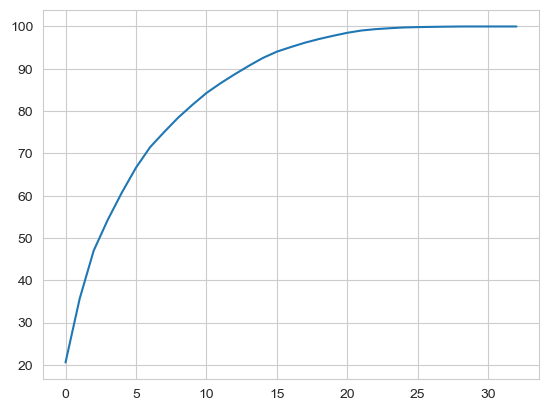

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

In [68]:
class PCATransformer(BaseEstimator, TransformerMixin):
  def __init__(self, n_components):
    self.numeric_cols = numeric_cols
    self.n_components = n_components

  def fit(self, X, y=None):
    pca = PCA(self.n_components)
    self.pca = pca.fit(X[numeric_cols])
    return self

  def transform(self, X, y=None):
    # Perform arbitary transformation
    X_transformed = X.copy()
    pcs = self.pca.transform(X_transformed[self.numeric_cols])
    pcs = pd.DataFrame(data = pcs, index=X_transformed.index)
    pcs = pcs.add_prefix('PC')
    X_transformed = pd.concat([X_transformed,pcs],axis=1)
    return X_transformed

In [69]:
print(X_transformed_train[numeric_cols].isna().sum())


SUCURSAL                           0
EDAD                               0
SUELDO                             0
COD_DEPEND                         0
ANTIGUEDAD                         0
NRO_HIJOS                          0
PERSONAS_ACARGO                    0
AHORRO_PERMANENTE                  0
SLD_APORTES                        0
NO_OBLIGACIÓN                      0
MONTO_SOLICITADO                   0
SALDO_CAPITAL                      0
SLD_INT                            0
SLD_MORA                           0
DIAS_VENCIDOS                      0
VENCCAPITAL                        0
VLR_GARANTIA                       0
VLRCOBERTURA_DISPONIBLE            0
VLR_CUOTA                          0
NOCUOTAS                           0
ALTURA                             0
INT_CTE_ORDEN                      0
INT_MORA_ORDEN                     0
SLD_SEG_VIDA                       0
SUCCREDITO                         0
CANTIDAD_GARANTÍAS                 0
DIAS_VENCIDOS_INT                  0
V

## Lasso para selección de variables

Ya que hemos añadido tantas variables nuevas calculadas a partir de las variables originales, hay que hacer una selección de variables más importantes para los modelos. Para esto usaremos la selección de variables de Lasso.

In [70]:
# Una vez limpio, intenta la selección de características
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight='balanced'))
sel_.fit(X_transformed_train, y_train)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [71]:
selected_feat = X_transformed_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_transformed_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(sel_.estimator_.coef_ == 0)))

total features: 81
selected features: 67
features with coefficients shrank to zero: 123


In [72]:
print("Eliminados")
X_transformed_train.columns[~(sel_.get_support())]

Eliminados


Index(['VALOR_INGRESO_MENSUAL', 'VALOR_EGRESO_MENSUAL', 'VLR_GARANTIA',
       'INT_CTE_ORDEN', 'VLRAPLICADO_GARANT', 'DIAS_VENCIDOS_INT',
       'VALOR_COMERCIAL_ACTIVOS', 'TIPO_DE_ASOCIADO_Otras Empresas',
       'ESTADO_CIVIL_Separado', 'ESTADO_CIVIL_Viudo',
       'NIVEL_EDUCATIVO_No Aplica', 'NIVEL_EDUCATIVO_Transición',
       'NIVEL_EDUCATIVO_Doctorado', 'GARANTÍA_REAL_Prenda'],
      dtype='object')

In [73]:
print("Se mantienen")
X_transformed_train.columns[(sel_.get_support())]

Se mantienen


Index(['SUCURSAL', 'EDAD', 'SUELDO', 'COD_DEPEND', 'ANTIGUEDAD', 'NRO_HIJOS',
       'PERSONAS_ACARGO', 'AHORRO_PERMANENTE', 'SLD_APORTES', 'NO_OBLIGACIÓN',
       'MONTO_SOLICITADO', 'SALDO_CAPITAL', 'SLD_INT', 'SLD_MORA',
       'DIAS_VENCIDOS', 'VENCCAPITAL', 'VLRCOBERTURA_DISPONIBLE', 'VLR_CUOTA',
       'NOCUOTAS', 'ALTURA', 'INT_MORA_ORDEN', 'SLD_SEG_VIDA', 'SUCCREDITO',
       'CANTIDAD_GARANTÍAS', 'VENCIDO_INT', 'DIAS_VENCIDOS_CAPITAL',
       'VALOR_PERDIDA_ESPERADA_APLICADA', 'VALOR_SALDO_PASIVOS', 'SCORING',
       'ANTIGÜEDAD_AÑOS', 'SEXO_F', 'SEXO_M', 'ESTADO_Asociado Activo',
       'ESTADO_No asociado', 'TIPO_DE_ASOCIADO_Empresa Vinculada',
       'TIPO_DE_ASOCIADO_Pensionado', 'TIPO_DE_ASOCIADO_Indepdiente',
       'ESTADO_CIVIL_Union libre', 'ESTADO_CIVIL_Soltero',
       'ESTADO_CIVIL_Divorciado', 'ESTADO_CIVIL_Casado',
       'NIVEL_EDUCATIVO_Profesional', 'NIVEL_EDUCATIVO_Tecnológico',
       'NIVEL_EDUCATIVO_Maestría', 'NIVEL_EDUCATIVO_Especialización',
       'NIV

Creamos ahora un objeto Transformer que haga la selección de variables

In [74]:
ns_probs = [0 for _ in range(len(y_test))]

## MODELAMIENTO

Iniciaremos con la creación de modelos. Para esto, realizaremos los siguientes pasos:

Haremos cross validation sobre el set de entrenamiento, esto con la intención de buscar cuál modelo funciona mejor con pocos datos. Del resultado del paso anterior, escogeremos los modelos que mejor se comporten. Esto nos dará información sobre qué tan bien generaliza el modelo los datos.

In [75]:
X_train.head(3)

,SUCURSAL,ESTADO,EDAD,TIPO_DE_ASOCIADO,SUELDO,COD_DEPEND,SEXO,ANTIGUEDAD,ESTADO_CIVIL,NRO_HIJOS,...,GARANTÍA_REAL,DIAS_VENCIDOS_INT,VENCIDO_INT,DIAS_VENCIDOS_CAPITAL,VALOR_PERDIDA_ESPERADA_APLICADA,VALOR_COMERCIAL_ACTIVOS,VALOR_SALDO_PASIVOS,SCORING,ANTIGÜEDAD_AÑOS,CANAL
389,1,Asociado Activo,76,Pensionado,4161483,0,F,44,Soltero,0,...,Sin Garantia,0,0,0,0,9000000,138684000,60,44.18,CAJA
5681,6,Asociado Activo,42,Empresa Vinculada,6000000,0,M,17,Soltero,0,...,Sin Garantia,0,0,0,13149,20000000,11118000,90,17.19,NOMINA
2040,1,Asociado Activo,41,Empresa Vinculada,1583550,0,M,8,Union libre,1,...,Sin Garantia,0,0,0,11377,55000000,25445000,75,8.28,NOMINA


In [76]:
# Paso 1: Identificar columnas categóricas
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Paso 2: Aplicar One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

# Paso 3: Asegurar consistencia entre X_train y X_test
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Paso 4: Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_encoded = pd.DataFrame(imputer.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_encoded = pd.DataFrame(imputer.transform(X_test_encoded), columns=X_test_encoded.columns)

# Paso 5: Crear el modelo de selección por Lasso
selector = SelectFromModel(
    LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight='balanced')
)

# Ajustar el selector a los datos de entrenamiento
selector.fit(X_train_encoded, y_train)

# Obtener las columnas seleccionadas
selected_features = X_train_encoded.columns[selector.get_support()]
removed_features = X_train_encoded.columns[~selector.get_support()]


## SVM LINEAL

In [77]:
# Paso 5: Crear pipeline con selección de características (Lasso), escalado y LinearSVC
pipelineSL = Pipeline([
    ('feature_selection', SelectFromModel(
        LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight='balanced'))),  # Selección por Lasso
    ('scaler', StandardScaler()),  # Escalar variables numéricas
    ('classifier', LinearSVC(max_iter=5000))  # Modelo LinearSVC
])

# Paso 6: Entrenar el modelo
pipelineSL.fit(X_train_encoded, y_train)  # Usar pipelineSL en lugar de pipeline

# Paso 7: Validar el modelo
print("Entrenamiento completado")

# Paso 8: Evaluar el modelo
y_pred = pipelineSL.predict(X_test_encoded)  # Usar pipelineSL en lugar de pipeline

# Paso 9: Métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))



Entrenamiento completado
Reporte de clasificación:
              precision    recall  f1-score   support

        ALTO       1.00      1.00      1.00       399
        BAJO       0.99      0.97      0.98       176
       MEDIO       0.98      1.00      0.99       420

    accuracy                           0.99       995
   macro avg       0.99      0.99      0.99       995
weighted avg       0.99      0.99      0.99       995

Precisión: 0.9919597989949749


In [78]:
from sklearn.model_selection import cross_val_score, cross_validate

# Aplicar validación cruzada
scores = cross_validate(
    pipelineSL, 
    X_train_encoded, 
    y_train, 
    cv=5,  # Número de particiones (folds)
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],  # Métricas
    return_train_score=True
)

# Crear un DataFrame con los resultados
import pandas as pd
cv_results = pd.DataFrame(scores)

# Calcular promedios de métricas
print("Promedios de métricas:")
print(cv_results[['test_accuracy', 'test_precision_weighted', 'test_recall_weighted', 'test_f1_weighted']].mean())


Promedios de métricas:
test_accuracy             0.98
test_precision_weighted   0.98
test_recall_weighted      0.98
test_f1_weighted          0.98
dtype: float64


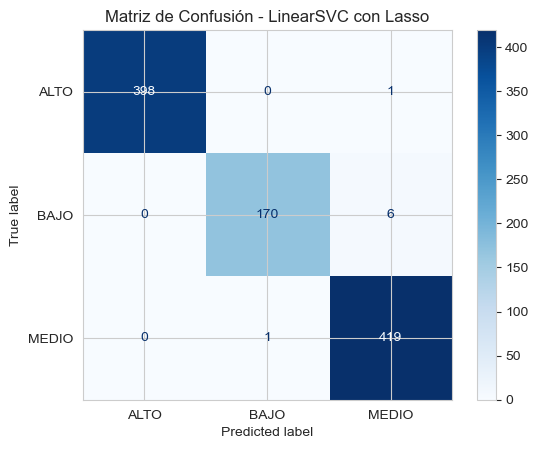

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Paso 10: Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipelineSL.named_steps['classifier'].classes_)
disp.plot(cmap="Blues", values_format="d")
ax.grid(False)
# Mostrar la gráfica
plt.title("Matriz de Confusión - LinearSVC con Lasso")
plt.show()


## REGRESION LOGISTICA

In [80]:
# Paso 5: Crear pipeline con escalado y LogisticRegression
pipelineRL = Pipeline([
    ('feature_selection', SelectFromModel(
        LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('scaler', StandardScaler()),  # Escalar variables numéricas
    ('classifier', LogisticRegression(max_iter=5000))  # Modelo de regresión logística
])

# Paso 6: Entrenar el modelo
pipelineRL.fit(X_train_encoded, y_train)

# Paso 7: Validar el modelo
print("Entrenamiento completado")

# Paso 8: Evaluar el modelo
y_pred = pipelineRL.predict(X_test_encoded)

# Paso 9: Métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

Entrenamiento completado
Reporte de clasificación:
              precision    recall  f1-score   support

        ALTO       1.00      0.99      1.00       399
        BAJO       1.00      0.95      0.97       176
       MEDIO       0.97      1.00      0.99       420

    accuracy                           0.99       995
   macro avg       0.99      0.98      0.99       995
weighted avg       0.99      0.99      0.99       995

Precisión: 0.9889447236180905


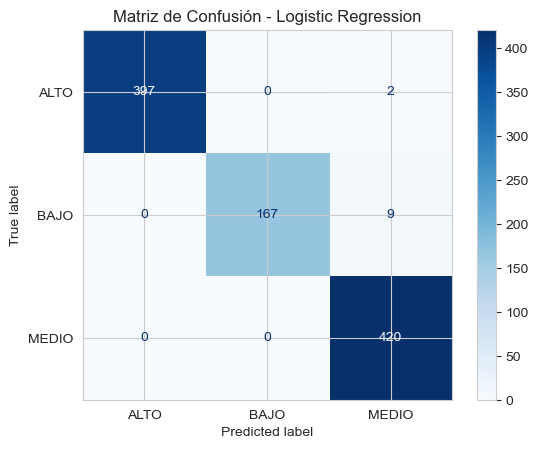

In [81]:
# Paso 10: Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipelineRL.named_steps['classifier'].classes_)
disp.plot(cmap="Blues", values_format="d")

# Mostrar la gráfica
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()


In [82]:
from sklearn.model_selection import cross_val_score, cross_validate

# Aplicar validación cruzada
scores = cross_validate(
    pipelineRL, 
    X_train_encoded, 
    y_train, 
    cv=5,  # Número de particiones (folds)
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],  # Métricas
    return_train_score=True
)

# Crear un DataFrame con los resultados
import pandas as pd
cv_results = pd.DataFrame(scores)

# Calcular promedios de métricas
print("Promedios de métricas:")
print(cv_results[['test_accuracy', 'test_precision_weighted', 'test_recall_weighted', 'test_f1_weighted']].mean())

Promedios de métricas:
test_accuracy             0.98
test_precision_weighted   0.98
test_recall_weighted      0.98
test_f1_weighted          0.98
dtype: float64


## ARBOLES DE DECISIÓN

Entrenamiento completado
Reporte de clasificación:
              precision    recall  f1-score   support

        ALTO       1.00      1.00      1.00       399
        BAJO       1.00      1.00      1.00       176
       MEDIO       1.00      1.00      1.00       420

    accuracy                           1.00       995
   macro avg       1.00      1.00      1.00       995
weighted avg       1.00      1.00      1.00       995

Precisión: 1.0


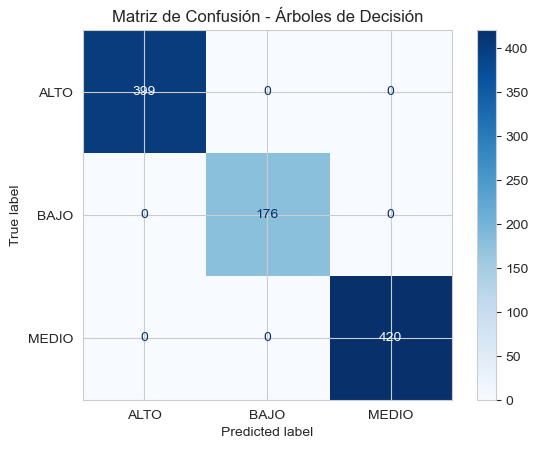

In [83]:
# Paso 5: Crear pipeline con escalado y DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
pipelineDT = Pipeline([
    ('feature_selection', SelectFromModel(
        LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('scaler', StandardScaler()),  # Escalar variables numéricas
    ('classifier', DecisionTreeClassifier(random_state=42))  # Modelo de árboles de decisión
])

# Paso 6: Entrenar el modelo
pipelineDT.fit(X_train_encoded, y_train)

# Paso 7: Validar el modelo
print("Entrenamiento completado")

# Paso 8: Evaluar el modelo
y_pred = pipelineDT.predict(X_test_encoded)

# Paso 9: Métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión:", accuracy_score(y_test, y_pred))

# Paso 10: Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipelineDT.classes_)
disp.plot(cmap="Blues", values_format="d")

# Mostrar la gráfica
plt.title("Matriz de Confusión - Árboles de Decisión")
plt.show()


In [84]:
from sklearn.model_selection import cross_val_score, cross_validate

# Aplicar validación cruzada
scores = cross_validate(
    pipelineDT, 
    X_train_encoded, 
    y_train, 
    cv=5,  # Número de particiones (folds)
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],  # Métricas
    return_train_score=True
)

# Crear un DataFrame con los resultados
import pandas as pd
cv_results = pd.DataFrame(scores)

# Calcular promedios de métricas
print("Promedios de métricas:")
print(cv_results[['test_accuracy', 'test_precision_weighted', 'test_recall_weighted', 'test_f1_weighted']].mean())

Promedios de métricas:
test_accuracy             1.00
test_precision_weighted   1.00
test_recall_weighted      1.00
test_f1_weighted          1.00
dtype: float64


## RADOMFOREST

              precision    recall  f1-score   support

        ALTO       1.00      1.00      1.00       399
        BAJO       0.99      1.00      0.99       176
       MEDIO       1.00      1.00      1.00       420

    accuracy                           1.00       995
   macro avg       1.00      1.00      1.00       995
weighted avg       1.00      1.00      1.00       995



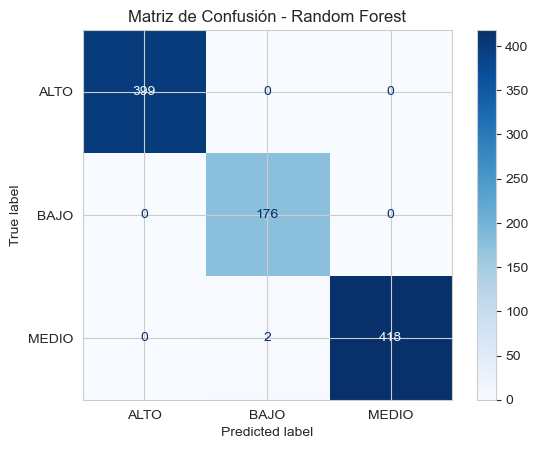

In [85]:
from sklearn.ensemble import RandomForestClassifier

# Crear pipeline con Random Forest
pipelineRF = Pipeline([
    ('feature_selection', SelectFromModel(
        LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar y evaluar el modelo
pipelineRF.fit(X_train_encoded, y_train)
y_pred_rf = pipelineRF.predict(X_test_encoded)

# Reporte y matriz de confusión
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=pipelineRF.classes_)
disp_rf.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


In [86]:
from sklearn.model_selection import cross_val_score, cross_validate

# Aplicar validación cruzada
scores = cross_validate(
    pipelineRF, 
    X_train_encoded, 
    y_train, 
    cv=5,  # Número de particiones (folds)
    scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],  # Métricas
    return_train_score=True
)

# Crear un DataFrame con los resultados
import pandas as pd
cv_results = pd.DataFrame(scores)

# Calcular promedios de métricas
print("Promedios de métricas:")
print(cv_results[['test_accuracy', 'test_precision_weighted', 'test_recall_weighted', 'test_f1_weighted']].mean())

Promedios de métricas:
test_accuracy             1.00
test_precision_weighted   1.00
test_recall_weighted      1.00
test_f1_weighted          1.00
dtype: float64


In [87]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Crear el diccionario de pipelines
pipelines = {
    "Linear SVC": pipelineSL,
    "Logistic Regression": pipelineRL,
    "Decision Tree": pipelineDT,
    "Random Forest": pipelineRF
}

# Diccionario para almacenar resultados
results = {}

# Evaluar cada modelo
for model_name, pipeline in pipelines.items():
    # Entrenar el modelo
    pipeline.fit(X_train_encoded, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = pipeline.predict(X_test_encoded)
    
    # Generar el reporte de métricas
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Guardar métricas incluyendo Accuracy
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precisión': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }

# Crear un DataFrame con los resultados
metrics_df = pd.DataFrame(results).T

# Mostrar los resultados en la consola
print("Comparación de Métricas de Modelos")
print(metrics_df)



Comparación de Métricas de Modelos
                     Accuracy  Precisión  Recall  F1-Score
Linear SVC               0.99       0.99    0.99      0.99
Logistic Regression      0.99       0.99    0.99      0.99
Decision Tree            1.00       1.00    1.00      1.00
Random Forest            1.00       1.00    1.00      1.00


In [88]:
# Ajustar el pipeline
pipelineSL.fit(X_train_encoded, y_train)

# Obtener el selector de características
selector = pipelineSL.named_steps['feature_selection']

# Extraer las características seleccionadas
selected_features = X_train_encoded.columns[selector.get_support()]

# Mostrar las características seleccionadas
print("Características seleccionadas por Lasso:")
print(selected_features)



Características seleccionadas por Lasso:
Index(['SUCURSAL', 'EDAD', 'COD_DEPEND', 'ANTIGUEDAD', 'NRO_HIJOS',
       'PERSONAS_ACARGO', 'SLD_MORA', 'DIAS_VENCIDOS', 'NOCUOTAS', 'ALTURA',
       'INT_MORA_ORDEN', 'SLD_SEG_VIDA', 'SUCCREDITO', 'CANTIDAD_GARANTÍAS',
       'DIAS_VENCIDOS_INT', 'DIAS_VENCIDOS_CAPITAL', 'SCORING',
       'ANTIGÜEDAD_AÑOS', 'ESTADO_Asociado Activo', 'ESTADO_No asociado',
       'TIPO_DE_ASOCIADO_Empresa Vinculada', 'TIPO_DE_ASOCIADO_Indepdiente',
       'TIPO_DE_ASOCIADO_Otras Empresas', 'TIPO_DE_ASOCIADO_Pensionado',
       'SEXO_F', 'SEXO_M', 'ESTADO_CIVIL_Casado', 'ESTADO_CIVIL_Divorciado',
       'ESTADO_CIVIL_Soltero', 'ESTADO_CIVIL_Union libre', 'ESTRATO_Cinco',
       'ESTRATO_Cuatro', 'ESTRATO_Dos', 'ESTRATO_Seis', 'ESTRATO_Tres',
       'ESTRATO_Uno', 'NIVEL_EDUCATIVO_Básica',
       'NIVEL_EDUCATIVO_Especialización', 'NIVEL_EDUCATIVO_Maestría',
       'NIVEL_EDUCATIVO_Media', 'NIVEL_EDUCATIVO_Profesional',
       'NIVEL_EDUCATIVO_Tecnológico', 'NIVE

Análisis de Importancia de Características (Lasso):
                              Característica  Coeficiente  \
43               DESC_TIPO_VIVIENDA_Arriendo       -12.02   
44               DESC_TIPO_VIVIENDA_Familiar       -11.84   
37           NIVEL_EDUCATIVO_Especialización        -9.13   
27                   ESTADO_CIVIL_Divorciado        -8.57   
38                  NIVEL_EDUCATIVO_Maestría        -8.42   
39                     NIVEL_EDUCATIVO_Media        -0.93   
35                               ESTRATO_Uno         0.86   
49                       CODEUDORES_Codeudor        -0.25   
52                GARANTÍA_REAL_Sin Garantia        -0.22   
48                 DESC_TIPO_VIVIENDA_Propia        -0.22   
51                    GARANTÍA_REAL_Hipoteca         0.18   
26                       ESTADO_CIVIL_Casado         0.09   
4                                  NRO_HIJOS         0.05   
36                    NIVEL_EDUCATIVO_Básica        -0.04   
1                                

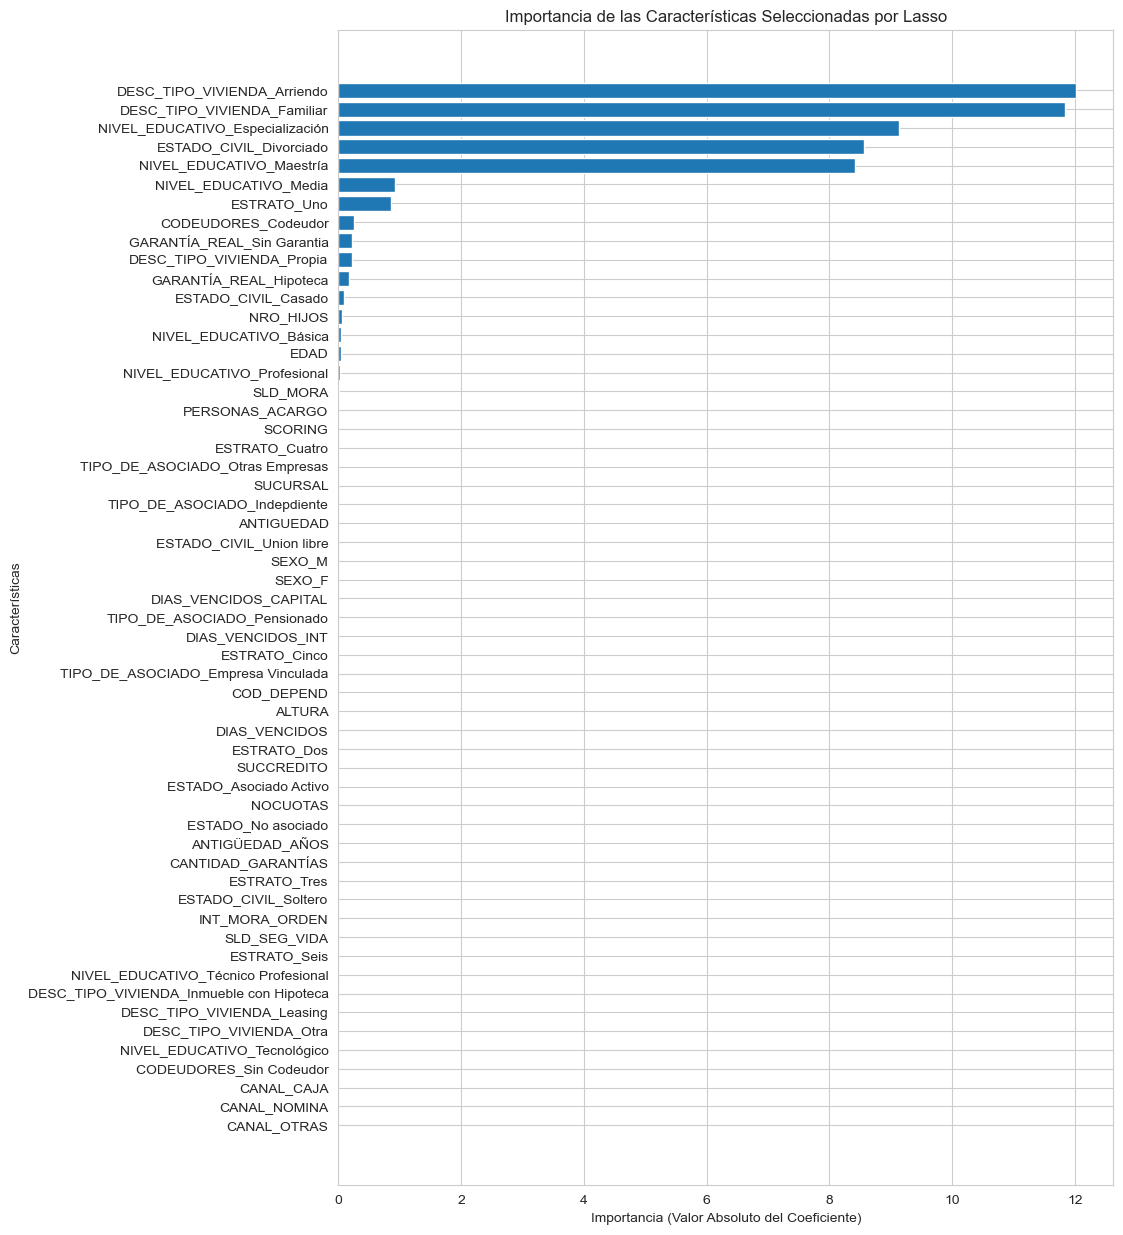

In [89]:
# Ajustar el pipeline
pipelineSL.fit(X_train_encoded, y_train)

# Obtener el selector de características
selector = pipelineSL.named_steps['feature_selection']

# Extraer las características seleccionadas
selected_features = X_train_encoded.columns[selector.get_support()]

# Obtener el modelo subyacente y verificar dimensiones
lasso_model = selector.estimator_
coefficients = lasso_model.coef_

# Ajustar coeficientes si es necesario
if len(selected_features) != len(coefficients.flatten()):
    coefficients = coefficients.flatten()[:len(selected_features)]

# Crear un DataFrame para analizar las características seleccionadas
feature_importance = pd.DataFrame({
    'Característica': selected_features,
    'Coeficiente': coefficients
})

# Ordenar por la magnitud de los coeficientes
feature_importance['Coeficiente_Absoluto'] = feature_importance['Coeficiente'].abs()
feature_importance = feature_importance.sort_values(by='Coeficiente_Absoluto', ascending=False)

# Mostrar resultados
print("Análisis de Importancia de Características (Lasso):")
print(feature_importance)

# Visualización
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.barh(feature_importance['Característica'], feature_importance['Coeficiente_Absoluto'])
plt.xlabel('Importancia (Valor Absoluto del Coeficiente)')
plt.ylabel('Características')
plt.title('Importancia de las Características Seleccionadas por Lasso')
plt.gca().invert_yaxis()
plt.show()
